# Data Science Project on Data Science Salaries

Dataset Description: The "Data Science Salaries" dataset provides valuable insights into the compensation trends and variations in the field of data science from 2020 to 2023. This dataset encompasses a comprehensive collection of salary information from various industries, organizations, and geographic regions, enabling data professionals, researchers, and organizations to analyze and understand the prevailing salary landscape in the data science domain during this four-year period. By examining this dataset, one can gain a deeper understanding of the factors influencing data science salaries, such as job roles, experience levels, educational backgrounds, and geographical locations. The dataset serves as a valuable resource for individuals seeking career guidance, companies aiming to benchmark their compensation strategies, and researchers investigating the evolving dynamics of the data science job market.

Collected At: https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023

## Setup

In [1]:
# Libraries for DA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', None)

## Read and Modify Dataset

In [2]:
# Read CSV
df = pd.read_csv("Latest_Data_Science_Salaries.csv")

In [3]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


In [4]:
df.head()

Job Title Employment Type Experience Level Expertise Level  Salary  \
0   Data Engineer       Full-Time           Senior          Expert  210000   
1   Data Engineer       Full-Time           Senior          Expert  165000   
2   Data Engineer       Full-Time           Senior          Expert  185900   
3   Data Engineer       Full-Time           Senior          Expert  129300   
4  Data Scientist       Full-Time           Senior          Expert  140000   

        Salary Currency Company Location  Salary in USD Employee Residence  \
0  United States Dollar    United States         210000      United States   
1  United States Dollar    United States         165000      United States   
2  United States Dollar    United States         185900      United States   
3  United States Dollar    United States         129300      United States   
4  United States Dollar    United States         140000      United States   

  Company Size  Year  
0       Medium  2023  
1       Medium  2023  
2       Medium  2023  
3       Medium  2023  
4       Medium  2023

In [5]:
# Check for null values
pd.isnull(df).sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [6]:
duplicates = df.duplicated()

# Calculate the sum of duplicate rows
sum_of_duplicates = duplicates.sum()
print('No of duplicates: ', sum_of_duplicates)

No of duplicates:  0


In [7]:
# Review through the unique values for each chosen features
print('Job Title values:',df['Job Title'].unique())
print('----------------------------------------------------------------------------')
print('Employment Type values:',df['Employment Type'].unique())
print('----------------------------------------------------------------------------')
print('Experience Level values:',df['Experience Level'].unique())
print('----------------------------------------------------------------------------')
print('Expertise Level values:',df['Expertise Level'].unique())
print('----------------------------------------------------------------------------')
print('Company Location values:',df['Company Location'].unique())
print('----------------------------------------------------------------------------')
print('Company Size values:',df['Company Size'].unique())
print('----------------------------------------------------------------------------')
print('Year values:',df['Year'].unique())

Job Title values: ['Data Engineer' 'Data Scientist' 'Analytics Engineer'
 'Business Intelligence Developer' 'Machine Learning Engineer'
 'Data Analyst' 'Decision Scientist' 'Machine Learning Software Engineer'
 'BI Developer' 'Machine Learning Scientist' 'BI Analyst' 'Data Manager'
 'Business Intelligence Engineer' 'ML Engineer' 'Data Science Manager'
 'AI Programmer' 'Applied Scientist' 'Data Analytics Manager'
 'Research Engineer' 'Research Scientist' 'Data Lead' 'Data Strategist'
 'Data Quality Analyst' 'Data Architect' 'AI Architect'
 'Computer Vision Engineer' 'Business Intelligence Analyst'
 'Principal Data Scientist' 'Staff Machine Learning Engineer'
 'Staff Data Scientist' 'Consultant Data Engineer'
 'Machine Learning Specialist' 'Head of Data' 'Data Quality Engineer'
 'Research Analyst' 'Principal Machine Learning Engineer'
 'Deep Learning Engineer' 'Data Visualization Specialist' 'MLOps Engineer'
 'Business Intelligence Data Analyst' 'Data Science Engineer'
 'Data Operations 

In [8]:
# Check both expertise and experience features
# Experience to Expertise
match = {'Entry':'Junior','Mid':'Intermediate','Senior':'Expert','Executive':'Director'}

similar = True

for ind in df.index:
    if df['Expertise Level'][ind] != match[df['Experience Level'][ind]]:
        similar = False
        break
        
if similar:
    print('Both Experience and Expertise has a similar meaning')
else:
    print('Experience and Expertise means differently')

Both Experience and Expertise has a similar meaning


In [9]:
# Drop unused columns
df.drop(['Salary','Salary Currency','Employee Residence','Expertise Level'],axis= 1, inplace=True)

In [10]:
# Rename columns
df.rename(columns={'Salary in USD':'Salary'},inplace=True)

In [11]:
# Describe numerical values
df.describe(include="all")

Job Title Employment Type Experience Level Company Location  \
count            3300            3300             3300             3300   
unique            111               4                4               71   
top     Data Engineer       Full-Time           Senior    United States   
freq              702            3261             2065             2495   
mean              NaN             NaN              NaN              NaN   
std               NaN             NaN              NaN              NaN   
min               NaN             NaN              NaN              NaN   
25%               NaN             NaN              NaN              NaN   
50%               NaN             NaN              NaN              NaN   
75%               NaN             NaN              NaN              NaN   
max               NaN             NaN              NaN              NaN   

               Salary Company Size         Year  
count     3300.000000         3300  3300.000000  
unique            NaN            3          NaN  
top               NaN       Medium          NaN  
freq              NaN         2707          NaN  
mean    142095.983939          NaN  2022.495455  
std      69028.235512          NaN     0.716355  
min      15000.000000          NaN  2020.000000  
25%      90000.000000          NaN  2022.000000  
50%     136000.000000          NaN  2023.000000  
75%     185000.000000          NaN  2023.000000  
max     450000.000000          NaN  2023.000000

In [12]:
# After Data Wrangling
df.head()

Job Title Employment Type Experience Level Company Location  Salary  \
0   Data Engineer       Full-Time           Senior    United States  210000   
1   Data Engineer       Full-Time           Senior    United States  165000   
2   Data Engineer       Full-Time           Senior    United States  185900   
3   Data Engineer       Full-Time           Senior    United States  129300   
4  Data Scientist       Full-Time           Senior    United States  140000   

  Company Size  Year  
0       Medium  2023  
1       Medium  2023  
2       Medium  2023  
3       Medium  2023  
4       Medium  2023

## Data Analysis (EDA)

### Plot Function

In [13]:
def bar_with_info(variable_counts,category):
    x_pos = range(len(variable_counts))
    
    plt.bar(x_pos, variable_counts.values)

    for i, v in enumerate(variable_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom')
        
    plt.xticks(x_pos, variable_counts.index, rotation=45)
    plt.xlabel(category)
    plt.ylabel('Frequency')
    
    title = 'Frequency of ' + category 
    plt.title(title)

In [14]:
def horizontal_bar(counts,category):
    plt.figure(figsize=(10, 18))
    plt.barh(counts.index,counts.values)

    plt.xlabel('Frequency')
    plt.ylabel(category)
    title = 'Frequency of ' + category 
    plt.title(title)

    plt.show()

In [15]:
def horizontal_bar_salary(grouped,category):
    cat = grouped[category]
    average_salaries = grouped_data['Salary']

    plt.figure(figsize=(10, 12))
    plt.barh(cat,average_salaries)

    plt.xlabel('Average Salary')
    plt.ylabel(category)
    title = 'Average Salary by ' + category
    plt.title(title)

    plt.show()

In [16]:
def bar_with_group_data(grouped, category, values, title):
    cat = grouped[category]
    val = grouped[values]
    x_pos = range(len(cat))

    plt.figure(figsize=(10,6))
    plt.bar(x_pos, val)

    for i, v in enumerate(val):
        plt.text(i, v, str(round(v,2)), ha='center', va='bottom')

    plt.xticks(x_pos, cat,fontsize=6,rotation=45)
    plt.ylabel(values)
    plt.xlabel(category)
    plt.title(title)

In [17]:
def average_salary_with_info(df,category):
    grouped_data = df.groupby(category)['Salary'].mean().reset_index().sort_values(by="Salary")
    
    category_levels = grouped_data[category]
    average_salaries = grouped_data['Salary']
    x_pos = range(len(category_levels))

    plt.bar(x_pos, average_salaries)

    for i, v in enumerate(average_salaries):
        plt.text(i, v, str(round(v,2)), ha='center', va='bottom')

    plt.xticks(x_pos, category_levels)
    plt.ylabel('Average Salary')
    plt.xlabel(category)
    title = 'Average Salary by ' + category
    plt.title(title)
    plt.show()

In [18]:
def multiple_box_salaries(df,category):
    plt.figure(figsize=(8, 6)) 
    
    plt.boxplot([df[df[category] == cat]['Salary'] for cat in df[category].unique()],
                labels=df[category].unique())
    
    plt.xlabel(category)
    plt.ylabel('Salary')
    
    title = 'Boxplot of Salaries for Different ' + category
    plt.title(title)

    plt.show()

In [19]:
def horizontal_box_group_salaries(df,grouped,category,title):
    plt.figure(figsize=(8, 6)) 
    plt.boxplot([df[df[category] == cat]['Salary'] for cat in grouped[category]],
                labels=grouped[category], vert=False)

    plt.xlabel('Salary')
    plt.ylabel(category)
    plt.xticks(rotation=90)
    plt.title(title)

    plt.show()

In [20]:
def simple_pie(values,category):
    plt.pie(values, labels=values.index, autopct='%1.1f%%')

    title = 'Pie Chart of ' + category
    plt.title(title)

    plt.show()

In [21]:
def multi_bar_with_cat(df,category_label,values_label,log_scale=False):
    plt.figure(figsize=(10, 6))
    bar_width = 0.2
    category = df.index

    for i, values in enumerate(df.columns):
        x = [index + bar_width * i for index in range(len(category))]
        plt.bar(x, df[values], width=bar_width, label=values)

    # Add labels and title
    plt.xlabel(category_label)
    plt.ylabel('Counts')
    
    if log_scale:
        plt.yscale('log')
        title = values_label + ' Throughout Different ' + category_label + ' (log scaled)'
    else:
        title = values_label + ' Throughout Different ' + category_label
    
    plt.title(title)

    # Adjust the x-axis ticks and labels
    plt.xticks([index + bar_width * 1.5 for index in range(len(category))], category,rotation=45)

    # Show the plot
    plt.legend(title=values_label)
    plt.show()

### Years

#### What is the period of the data and how many rows are there for each year?

In [22]:
year = df['Year']

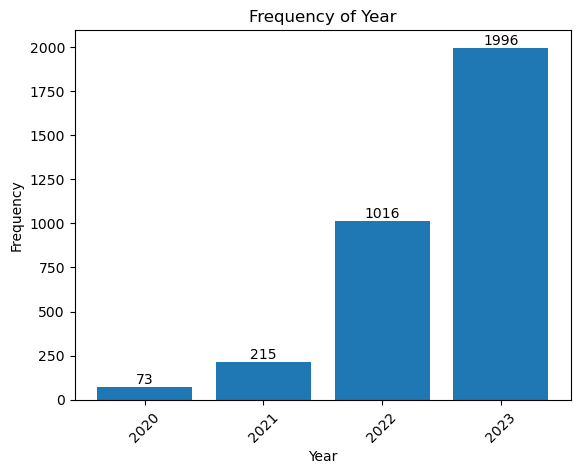

In [23]:
year_counts = year.value_counts().sort_values()

bar_with_info(year_counts,'Year')

### Salary

#### What is the distribution of the salary recorded? (overall and for each year)

In [24]:
salary = df['Salary']

Text(0.5, 1.0, 'Box Plot of Salaries')

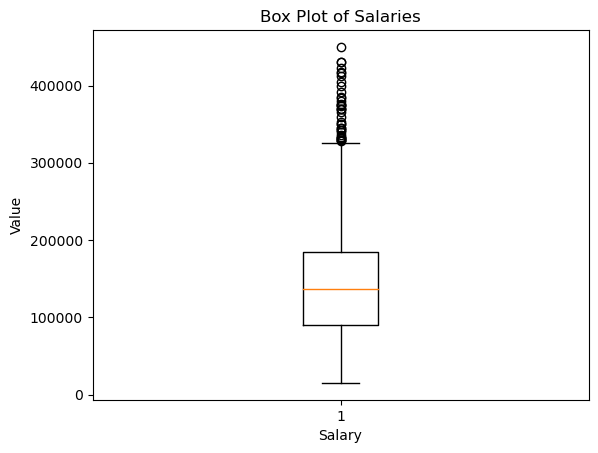

In [25]:
plt.boxplot(salary)
plt.xlabel('Salary')
plt.ylabel('Value')
plt.title('Box Plot of Salaries')

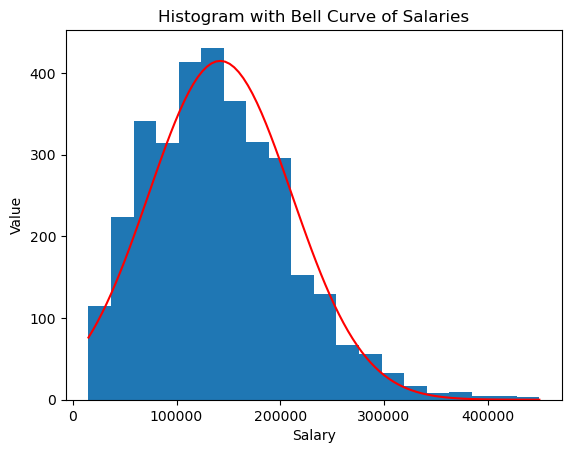

In [26]:
plt.hist(salary,bins=20)

mean = np.mean(salary)
std = np.std(salary)

# Display Bell Curve
x = np.linspace(min(salary), max(salary), 100)
y = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
y = y * (len(salary) * np.diff(plt.hist(salary, bins=20,density=True)[1])[0])
plt.plot(x, y, color='r')


plt.xlabel('Salary')
plt.ylabel('Value')
plt.title('Histogram with Bell Curve of Salaries')
plt.show()

According to the histogram, it can be seen that it is skewed, meaning there are outliers in the dataset. Outliers are then identified using 3 standard deviation.

In [27]:
upper_limit = salary.mean() + 3*salary.std()
lower_limit = salary.mean() - 3*salary.std()

print('Upper Limit: ' , upper_limit)
print('Lower Limit: ' , lower_limit)

Upper Limit:  349180.6904742057
Lower Limit:  -64988.722595417814


In [28]:
outliers = df[(salary>upper_limit) | (salary<lower_limit)]
outliers

Job Title Employment Type Experience Level  \
304                          ML Engineer       Full-Time           Senior   
431            Machine Learning Engineer       Full-Time           Senior   
457                       Data Scientist       Full-Time           Senior   
494                          ML Engineer       Full-Time           Senior   
647                    Research Engineer       Full-Time           Senior   
679                   Research Scientist       Full-Time           Senior   
707                   Research Scientist       Full-Time           Senior   
826        Analytics Engineering Manager       Full-Time           Senior   
1242                  Analytics Engineer       Full-Time              Mid   
1469            Director of Data Science       Full-Time        Executive   
1496                        AI Scientist       Full-Time           Senior   
1558                      Data Architect       Full-Time           Senior   
1751                      Data Scientist       Full-Time           Senior   
1815  Machine Learning Software Engineer       Full-Time           Senior   
1828                        Data Analyst       Full-Time           Senior   
1880                   Applied Scientist       Full-Time           Senior   
2190                        Data Analyst       Full-Time              Mid   
2385              Data Science Tech Lead       Full-Time           Senior   
2392                      Data Scientist       Full-Time           Senior   
3028                 Data Analytics Lead       Full-Time           Senior   
3033              Applied Data Scientist       Full-Time           Senior   
3085                  Research Scientist       Full-Time              Mid   
3228            Principal Data Scientist        Contract        Executive   
3292  Applied Machine Learning Scientist       Full-Time              Mid   
3295                      Data Scientist       Full-Time           Senior   

     Company Location  Salary Company Size  Year  
304     United States  383910       Medium  2023  
431     United States  392000       Medium  2023  
457     United States  359170       Medium  2023  
494     United States  365630       Medium  2023  
647     United States  370000       Medium  2023  
679     United States  370000       Medium  2023  
707     United States  374000       Medium  2023  
826    United Kingdom  399880        Large  2023  
1242   United Kingdom  430640       Medium  2023  
1469    United States  353200       Medium  2023  
1496           Israel  417937        Large  2023  
1558    United States  376080       Medium  2023  
1751    United States  370000       Medium  2023  
1815    United States  375000       Medium  2022  
1828    United States  385000       Medium  2023  
1880    United States  350000        Large  2023  
2190   United Kingdom  430967       Medium  2022  
2385    United States  375000        Large  2022  
2392    United States  350000       Medium  2022  
3028    United States  405000        Large  2022  
3033    United States  380000        Large  2022  
3085    United States  450000       Medium  2020  
3228    United States  416000        Small  2021  
3292    United States  423000        Large  2021  
3295    United States  412000        Large  2020

In [29]:
print('Number of outliers: ', len(outliers))

Number of outliers:  25


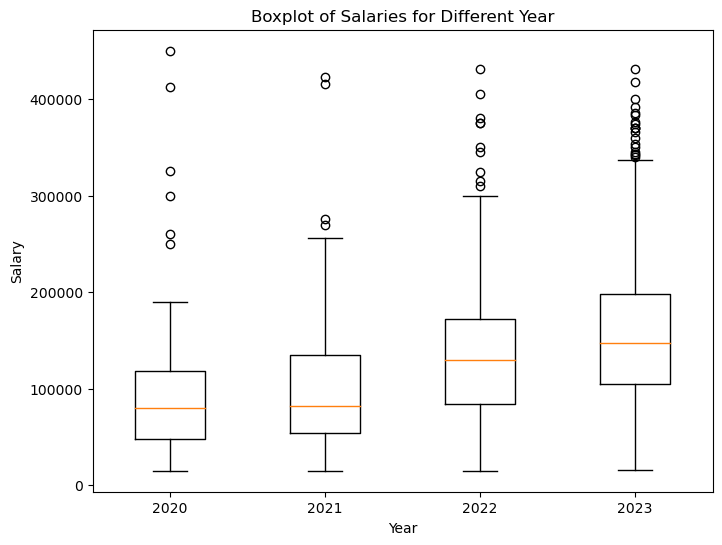

In [30]:
sorted_df = df.copy()
sorted_df.sort_values(by='Year', inplace=True)

multiple_box_salaries(sorted_df,'Year')

#### How salary has changed over the years?

Text(0.5, 1.0, 'Average Salary of DS through Year')

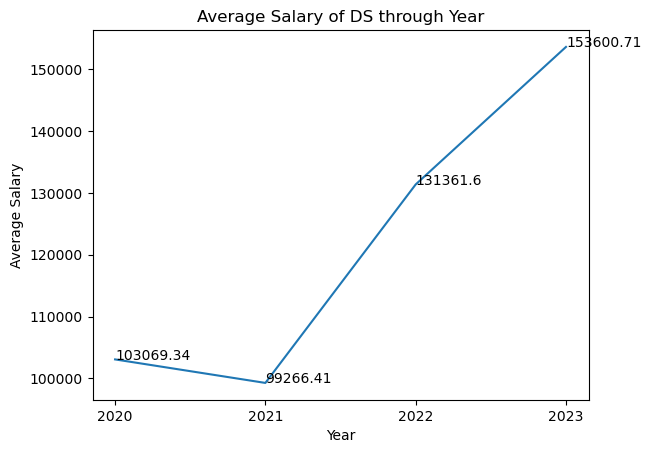

In [31]:
grouped_data = df.groupby('Year')['Salary'].mean().reset_index()
year = grouped_data['Year']
average_salaries = grouped_data['Salary']

for i in range(len(year)):
    plt.text(year[i], average_salaries[i], str(round(average_salaries[i],2)))

plt.plot(year, average_salaries)
plt.xticks(year, year)
plt.ylabel('Average Salary')
plt.xlabel('Year')
plt.title('Average Salary of DS through Year')

### Experience Levels

#### What is the proportion for each experience levels? (overall and for each year)

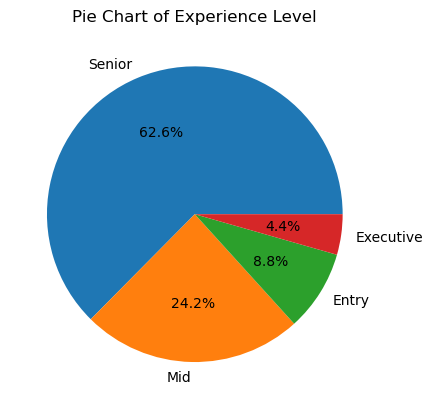

In [32]:
experience_counts = df['Experience Level'].value_counts()

simple_pie(experience_counts,'Experience Level')

In [33]:
experience_counts

Senior       2065
Mid           797
Entry         292
Executive     146
Name: Experience Level, dtype: int64

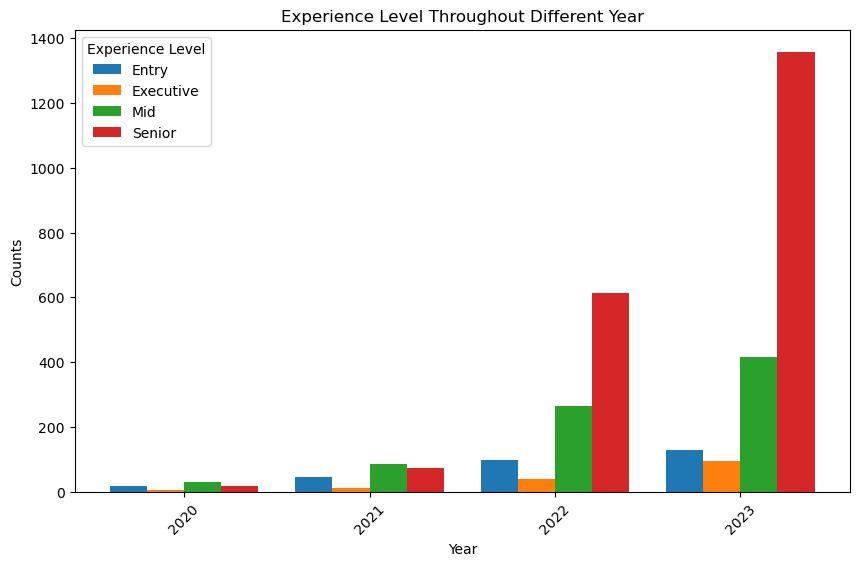

In [34]:
experience_counts_by_year = df.groupby(['Year', 'Experience Level']).size().unstack(fill_value=0)

multi_bar_with_cat(experience_counts_by_year,'Year','Experience Level')

In [35]:
experience_counts_by_year

Experience Level  Entry  Executive  Mid  Senior
Year                                           
2020                 19          4   31      19
2021                 46         10   85      74
2022                 99         38  265     614
2023                128         94  416    1358

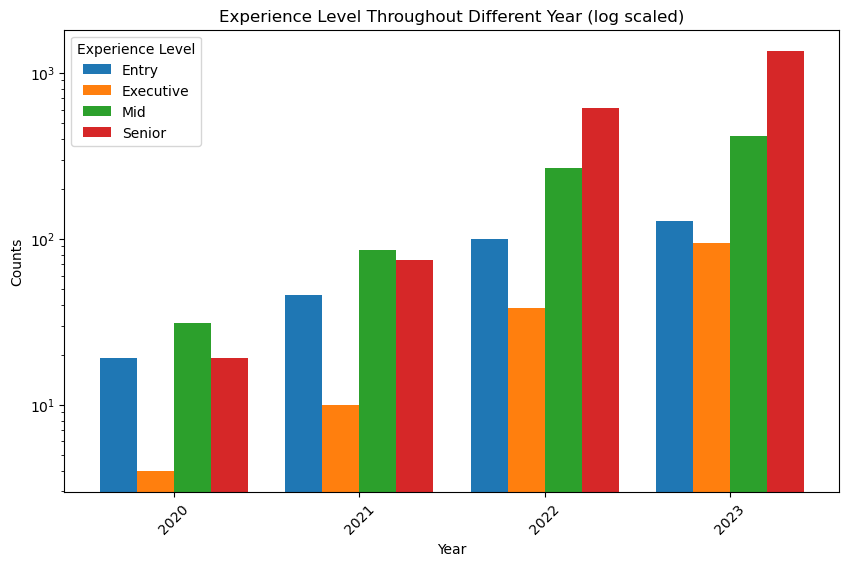

In [36]:
multi_bar_with_cat(experience_counts_by_year,'Year','Experience Level',True)

#### How salary is different throughout different experience level?

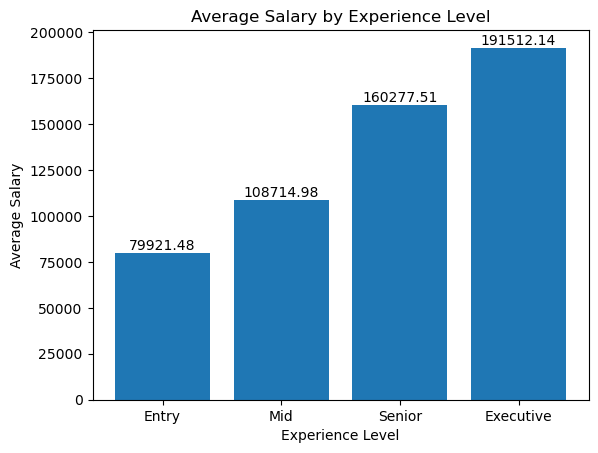

In [37]:
average_salary_with_info(df,'Experience Level')

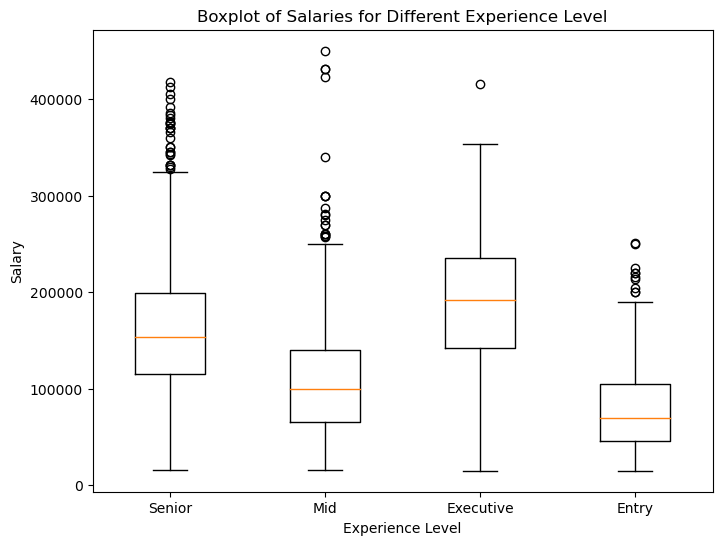

In [38]:
multiple_box_salaries(df,'Experience Level')

### Company Size

#### What is the proportion for each company sizes? (overall and for each year)

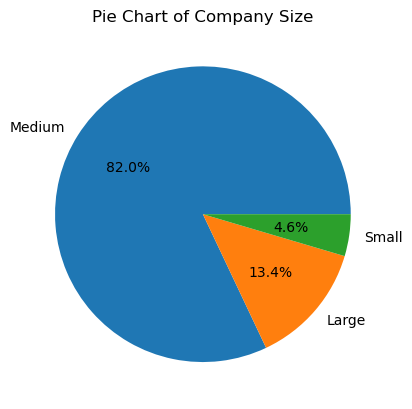

In [39]:
size_counts = df['Company Size'].value_counts()
simple_pie(size_counts,'Company Size')

In [40]:
size_counts

Medium    2707
Large      442
Small      151
Name: Company Size, dtype: int64

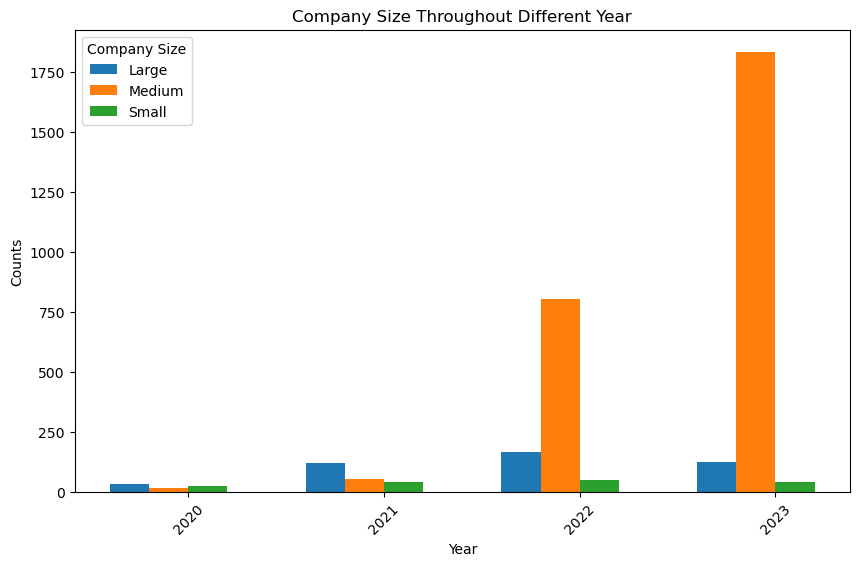

In [41]:
size_counts_by_year = df.groupby(['Year', 'Company Size']).size().unstack(fill_value=0)

multi_bar_with_cat(size_counts_by_year,'Year','Company Size')

In [42]:
size_counts_by_year

Company Size  Large  Medium  Small
Year                              
2020             33      17     23
2021            121      52     42
2022            165     804     47
2023            123    1834     39

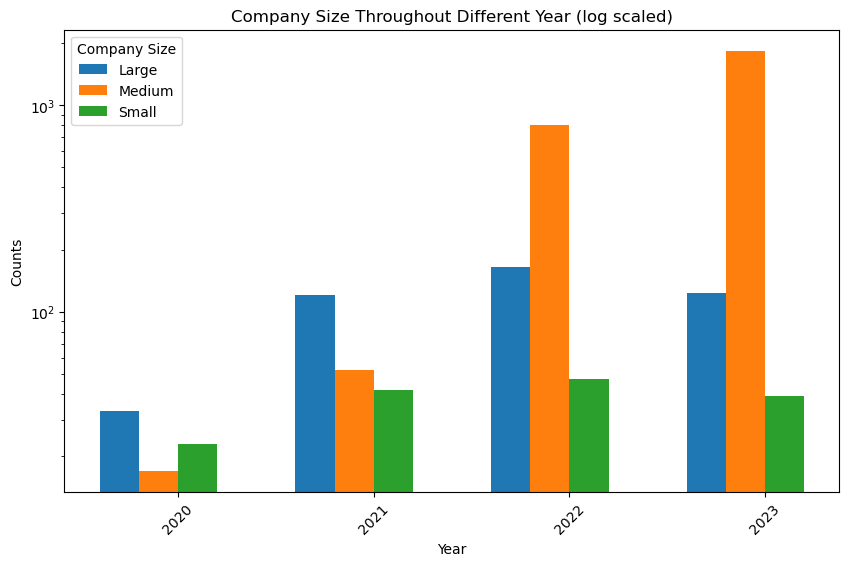

In [43]:
multi_bar_with_cat(size_counts_by_year,'Year','Company Size',True)

#### How salary is different throughout different company sizes?

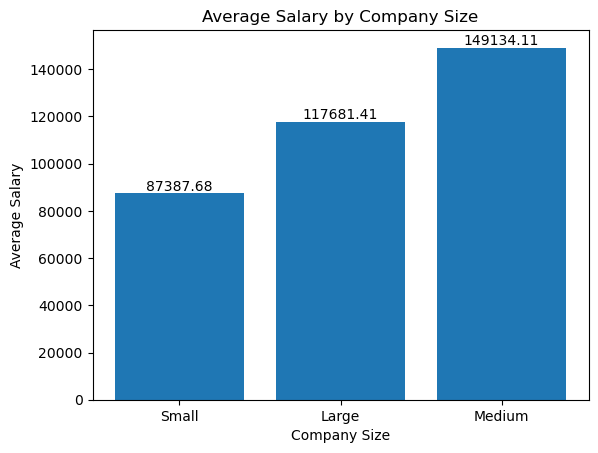

In [44]:
average_salary_with_info(df,'Company Size')

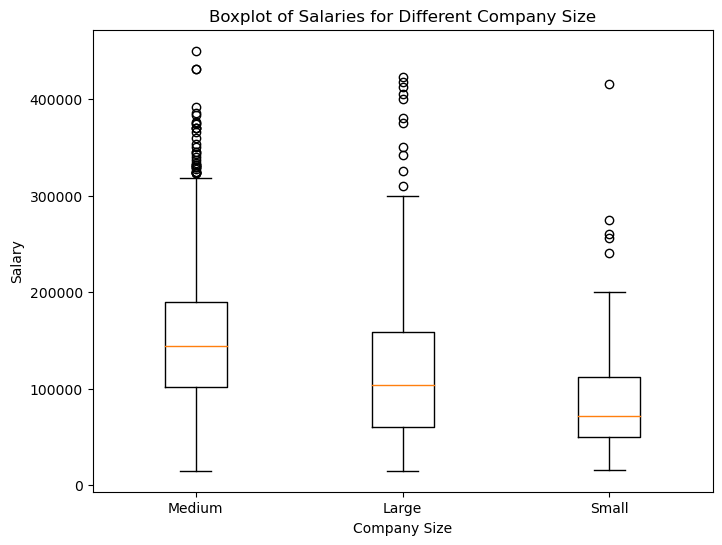

In [45]:
multiple_box_salaries(df,'Company Size')

#### How different levels of experience distributed in different size of companies?

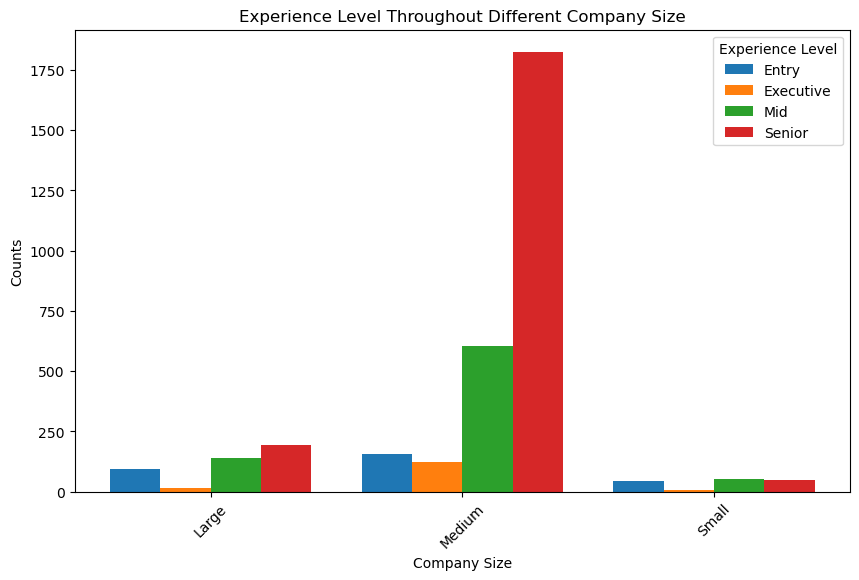

In [46]:
experience_counts_by_size = df.groupby(['Company Size', 'Experience Level']).size().unstack(fill_value=0)

multi_bar_with_cat(experience_counts_by_size,'Company Size','Experience Level')

In [47]:
experience_counts_by_size

Experience Level  Entry  Executive  Mid  Senior
Company Size                                   
Large                94         16  140     192
Medium              154        122  605    1826
Small                44          8   52      47

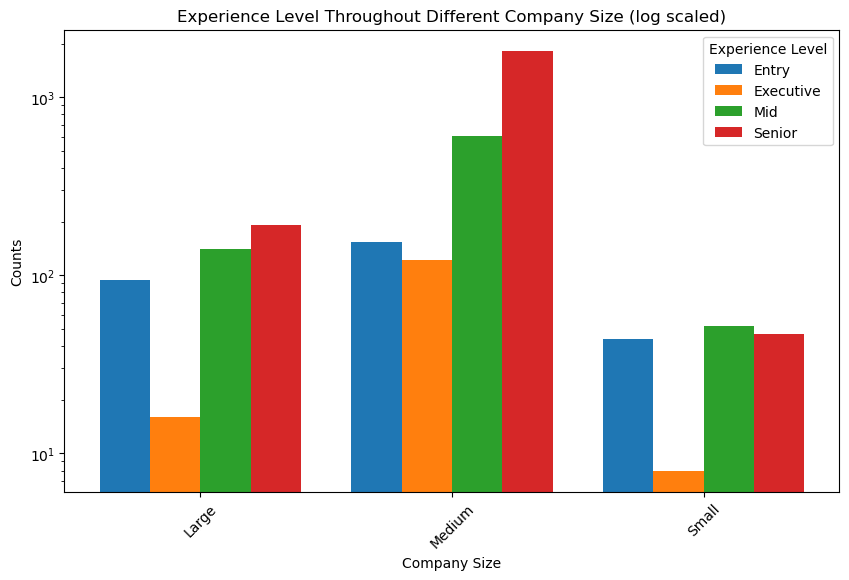

In [48]:
multi_bar_with_cat(experience_counts_by_size,'Company Size','Experience Level',True)

### Company Loc

#### How many data science employees are there for each countries?

In [49]:
company_loc = df['Company Location']

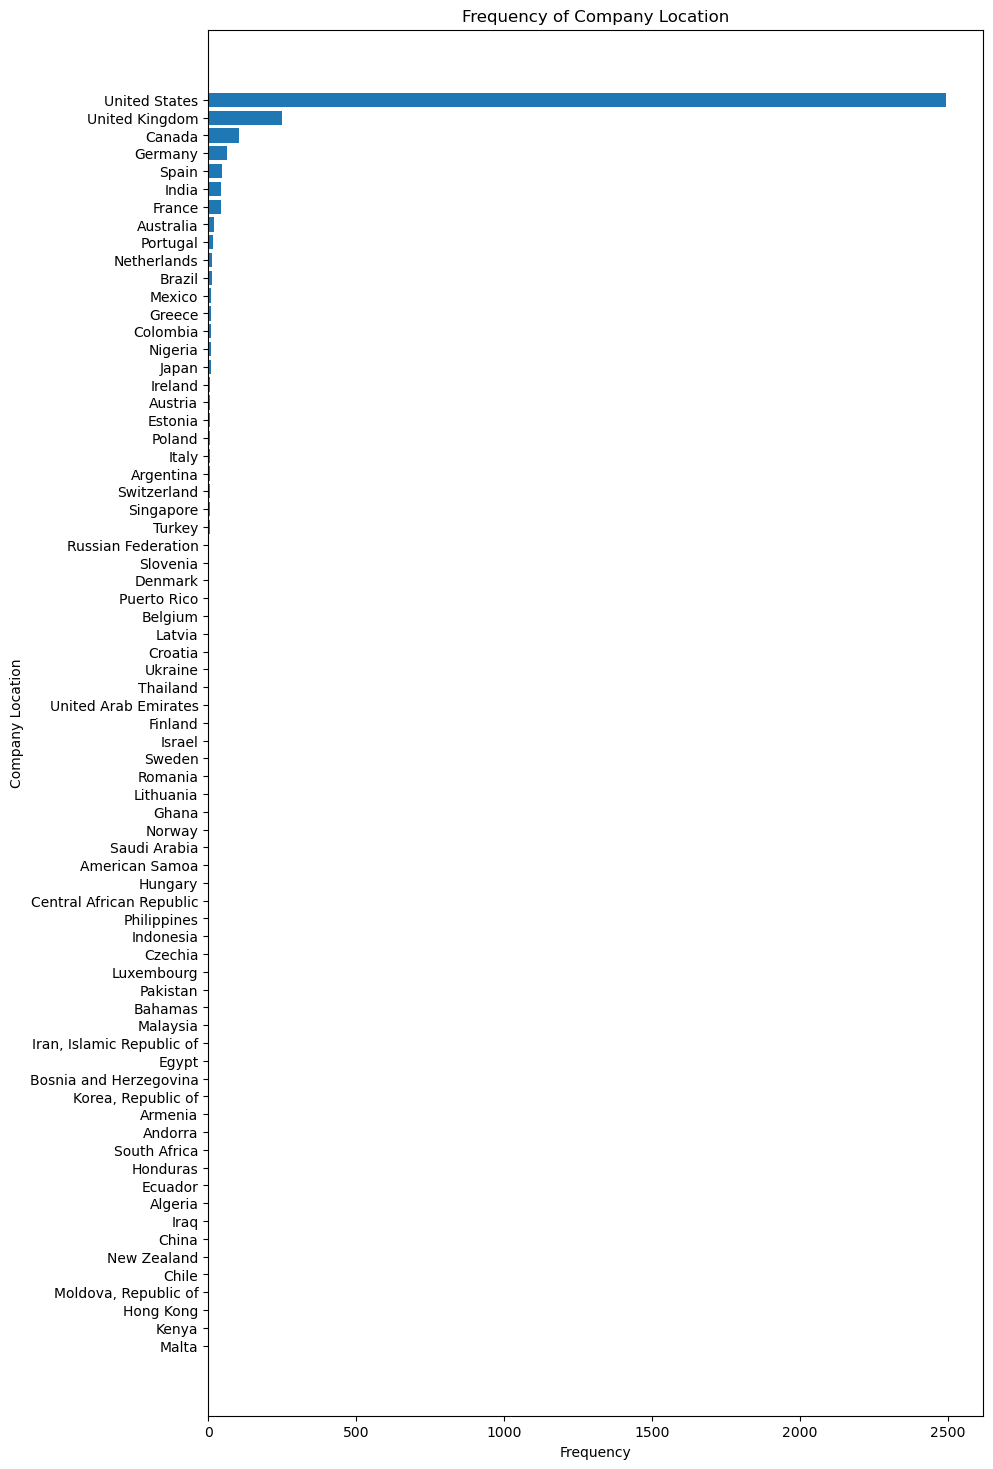

In [50]:
loc_counts = company_loc.value_counts().sort_values()

horizontal_bar(loc_counts,'Company Location')

In [51]:
loc_counts

Malta                           1
Kenya                           1
Hong Kong                       1
Moldova, Republic of            1
Chile                           1
New Zealand                     1
China                           1
Iraq                            1
Algeria                         1
Ecuador                         1
Honduras                        1
South Africa                    1
Andorra                         1
Armenia                         1
Korea, Republic of              1
Bosnia and Herzegovina          1
Egypt                           1
Iran, Islamic Republic of       1
Malaysia                        1
Bahamas                         1
Pakistan                        2
Luxembourg                      2
Czechia                         2
Indonesia                       2
Philippines                     2
Central African Republic        2
Hungary                         2
American Samoa                  2
Saudi Arabia                    2
Norway        

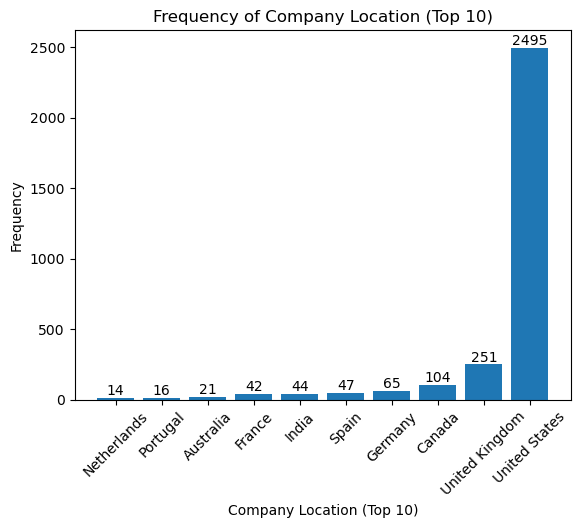

In [52]:
# Top 10 Locations
top_10_loc = loc_counts.tail(10)

bar_with_info(top_10_loc,'Company Location (Top 10)')

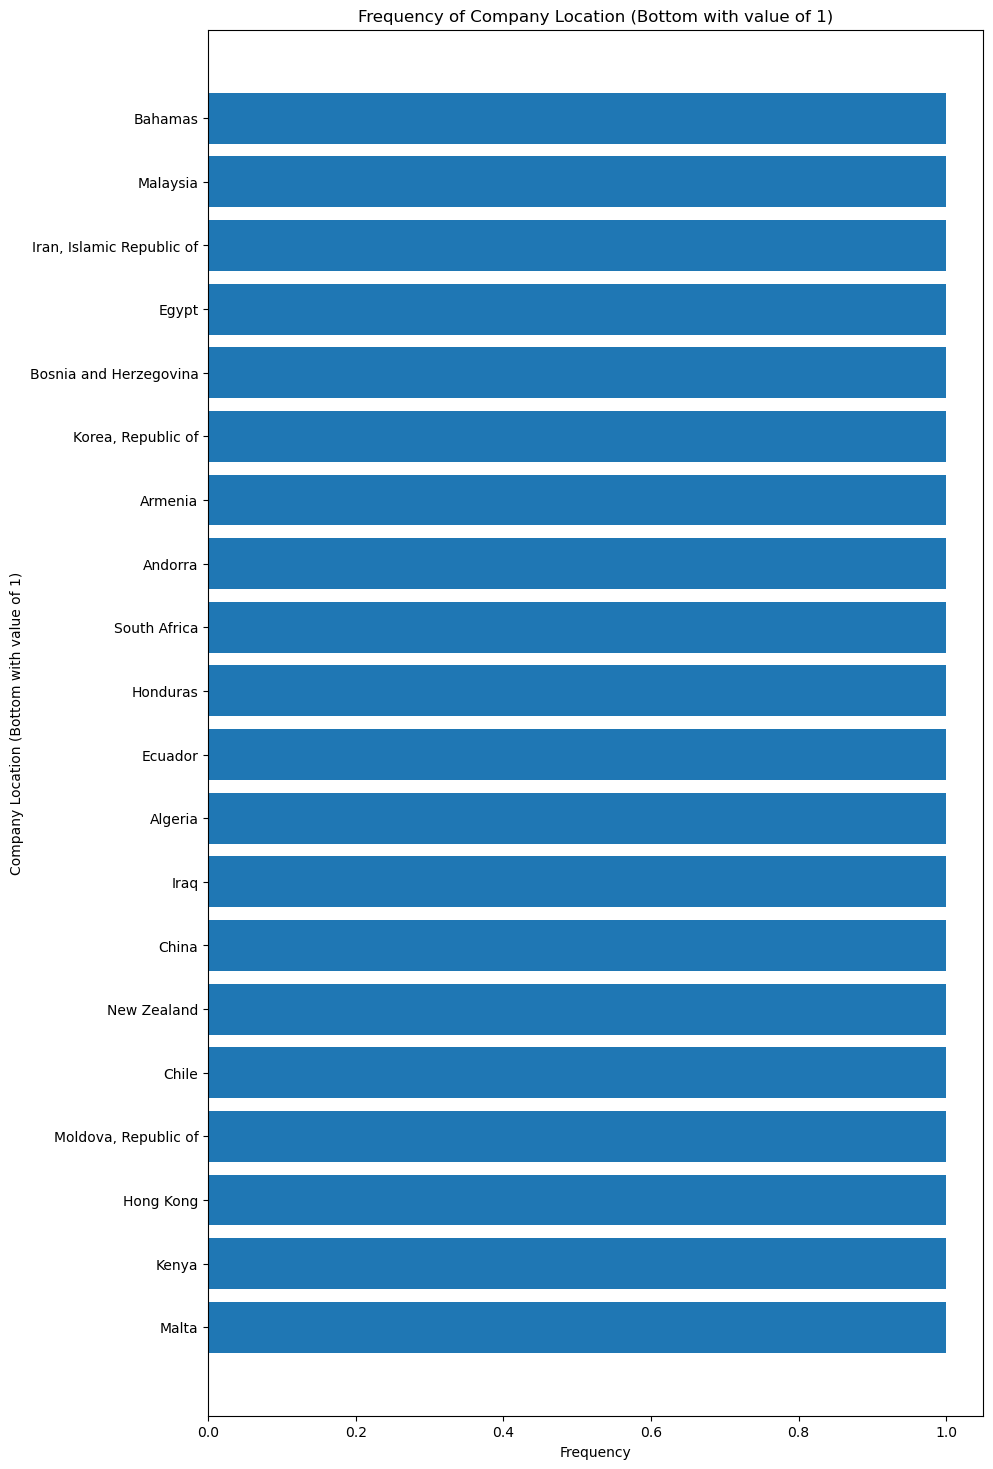

In [53]:
# Bottom Locations
bot_10_loc = loc_counts.loc[lambda x : x == 1]

horizontal_bar(bot_10_loc,'Company Location (Bottom with value of 1)')

#### How salary is different throughout different company locations?

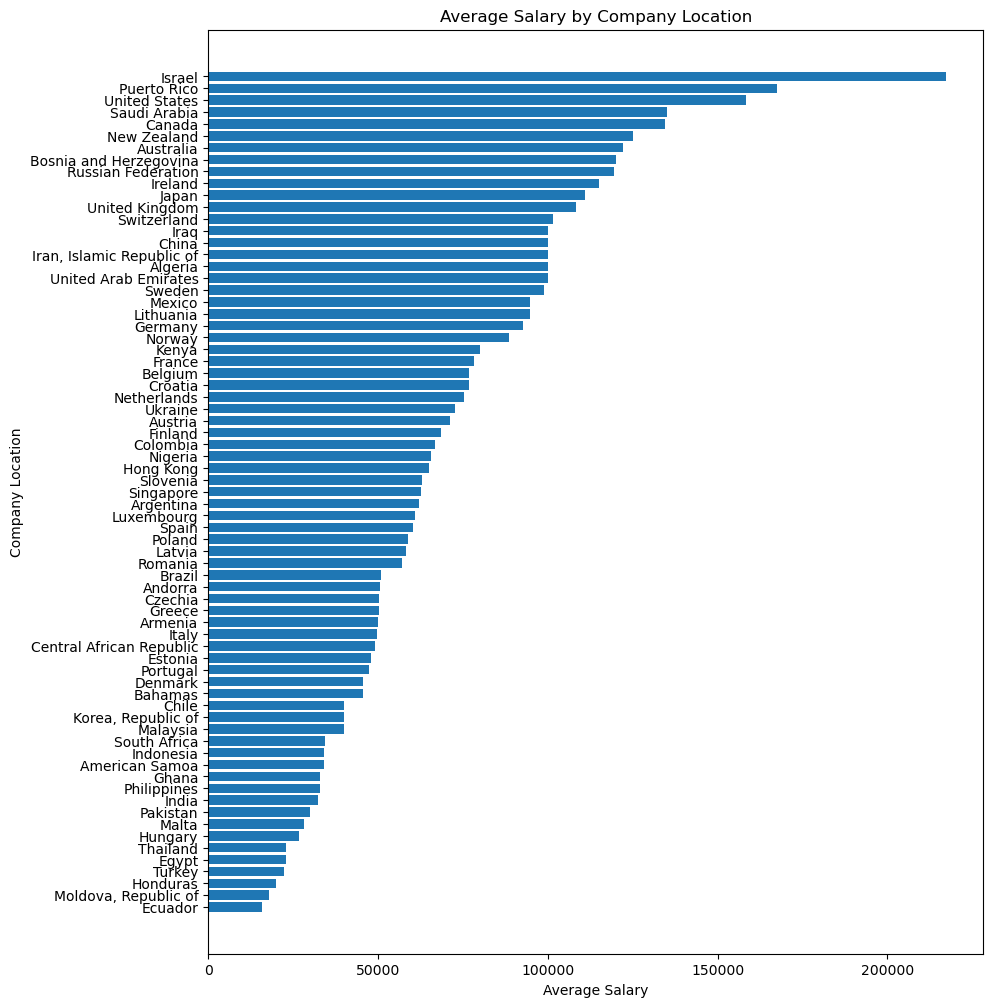

In [54]:
grouped_data = df.groupby('Company Location')['Salary'].mean().reset_index().sort_values(by="Salary")

horizontal_bar_salary(grouped_data,'Company Location')

In [55]:
grouped_data

Company Location         Salary
19                    Ecuador   16000.000000
46       Moldova, Republic of   18000.000000
27                   Honduras   20000.000000
66                     Turkey   22313.600000
20                      Egypt   22800.000000
65                   Thailand   22971.333333
29                    Hungary   26709.500000
44                      Malta   28369.000000
51                   Pakistan   30000.000000
30                      India   32314.704545
52                Philippines   32840.000000
25                      Ghana   33000.000000
1              American Samoa   34026.500000
31                  Indonesia   34208.000000
61               South Africa   34482.000000
43                   Malaysia   40000.000000
39         Korea, Republic of   40000.000000
13                      Chile   40038.000000
7                     Bahamas   45555.000000
18                    Denmark   45558.000000
54                   Portugal   47463.375000
21                    Estonia   48044.500000
12   Central African Republic   49216.000000
36                      Italy   49701.166667
4                     Armenia   50000.000000
26                     Greece   50208.600000
17                    Czechia   50234.000000
2                     Andorra   50745.000000
10                     Brazil   50925.583333
56                    Romania   56992.000000
40                     Latvia   58302.500000
53                     Poland   58879.833333
62                      Spain   60364.829787
42                 Luxembourg   60914.000000
3                   Argentina   62000.000000
59                  Singapore   62783.000000
60                   Slovenia   62956.000000
28                  Hong Kong   65058.000000
49                    Nigeria   65750.000000
15                   Colombia   66784.400000
22                    Finland   68519.333333
6                     Austria   71354.833333
67                    Ukraine   72666.666667
47                Netherlands   75470.071429
16                    Croatia   76726.000000
8                     Belgium   76864.750000
23                     France   78390.000000
38                      Kenya   80000.000000
50                     Norway   88462.000000
24                    Germany   92567.846154
41                  Lithuania   94812.000000
45                     Mexico   94864.636364
63                     Sweden   98791.333333
68       United Arab Emirates  100000.000000
0                     Algeria  100000.000000
32  Iran, Islamic Republic of  100000.000000
14                      China  100000.000000
33                       Iraq  100000.000000
64                Switzerland  101659.400000
69             United Kingdom  108424.573705
37                      Japan  110821.625000
34                    Ireland  115188.285714
57         Russian Federation  119500.000000
9      Bosnia and Herzegovina  120000.000000
5                   Australia  122133.619048
48                New Zealand  125000.000000
11                     Canada  134549.653846
58               Saudi Arabia  134999.000000
70              United States  158461.808016
55                Puerto Rico  167500.000000
35                     Israel  217332.000000

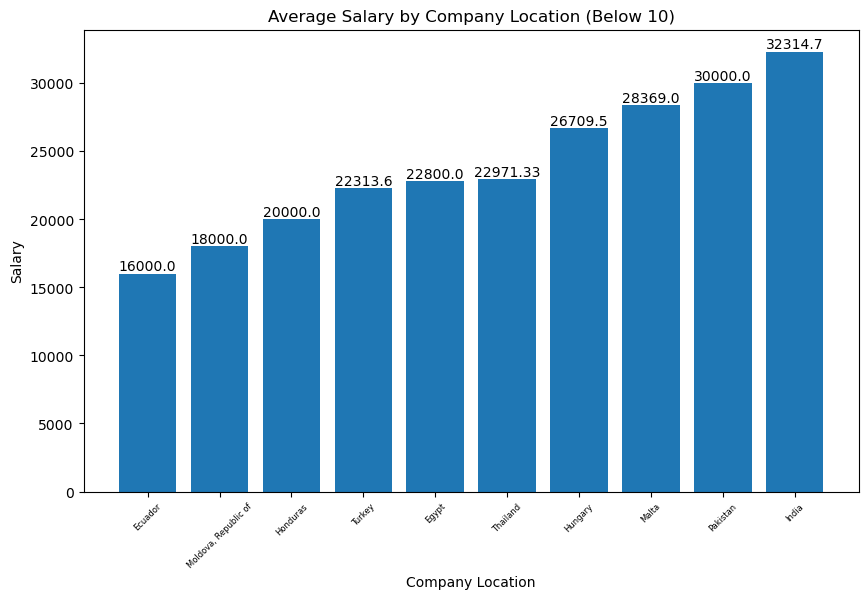

In [56]:
# BELOW 10
grouped = grouped_data.sort_values(by="Salary").head(10)
bar_with_group_data(grouped,'Company Location','Salary','Average Salary by Company Location (Below 10)')

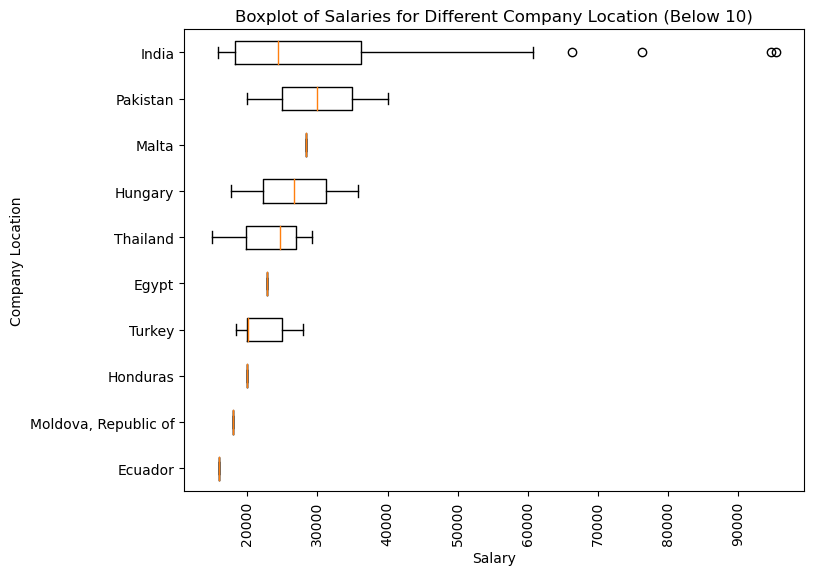

In [57]:
horizontal_box_group_salaries(df,grouped,'Company Location','Boxplot of Salaries for Different Company Location (Below 10)')

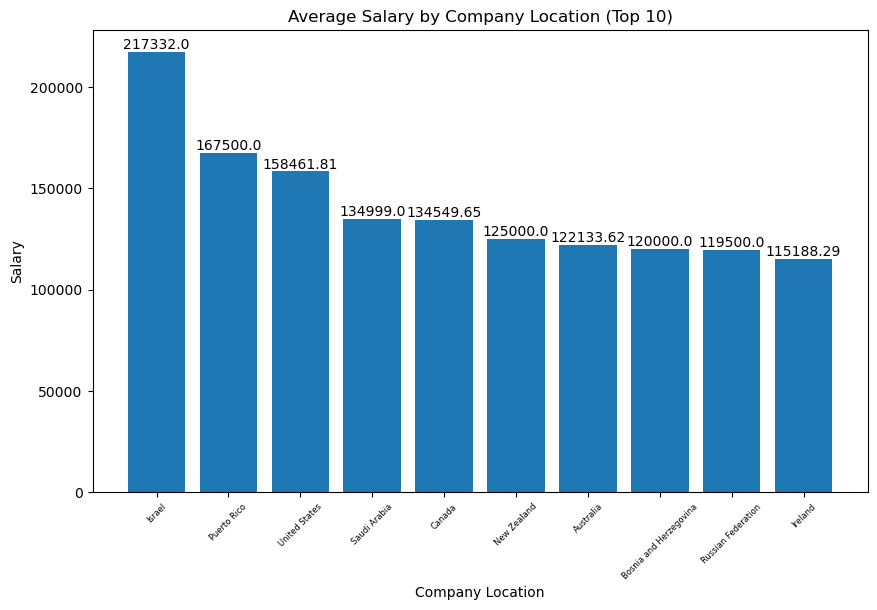

In [58]:
# UPPER 10
grouped = grouped_data.sort_values(by="Salary",ascending=False).head(10)
bar_with_group_data(grouped,'Company Location','Salary','Average Salary by Company Location (Top 10)')

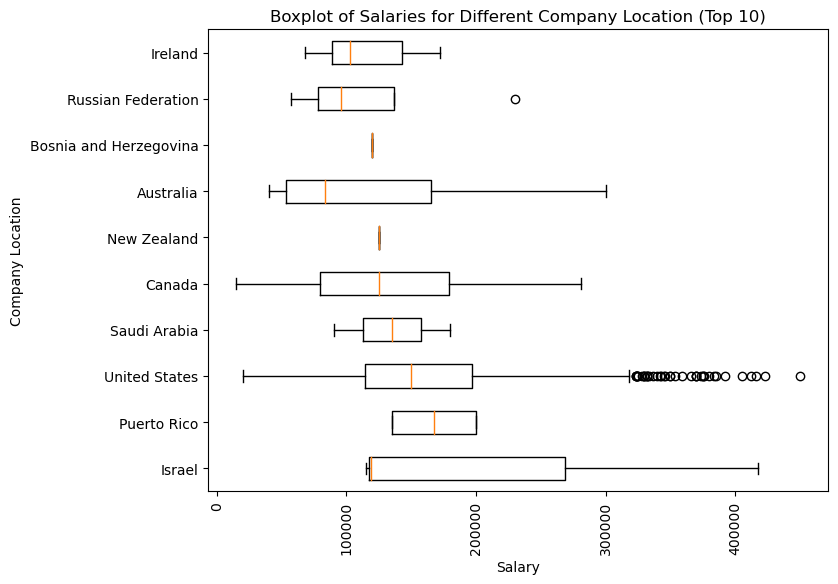

In [59]:
horizontal_box_group_salaries(df,grouped,'Company Location','Boxplot of Salaries for Different Company Location (Top 10)')

#### How data science employees' experience differ between location? 

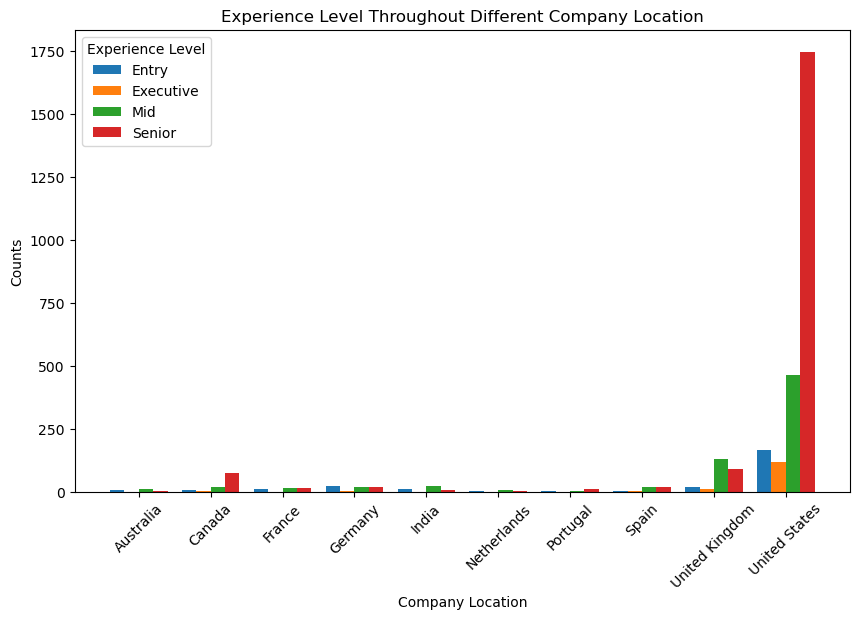

In [60]:
experience_counts_by_loc = df.groupby(['Company Location', 'Experience Level']).size().unstack(fill_value=0)
experience_counts_by_loc = experience_counts_by_loc[experience_counts_by_loc.index.isin(top_10_loc.index)]

multi_bar_with_cat(experience_counts_by_loc,'Company Location','Experience Level')

In [61]:
experience_counts_by_loc

Experience Level  Entry  Executive  Mid  Senior
Company Location                               
Australia             6          0   12       3
Canada                9          4   18      73
France               10          0   17      15
Germany              22          2   20      21
India                11          1   23       9
Netherlands           3          1    7       3
Portugal              3          0    3      10
Spain                 5          2   19      21
United Kingdom       18         10  132      91
United States       166        120  463    1746

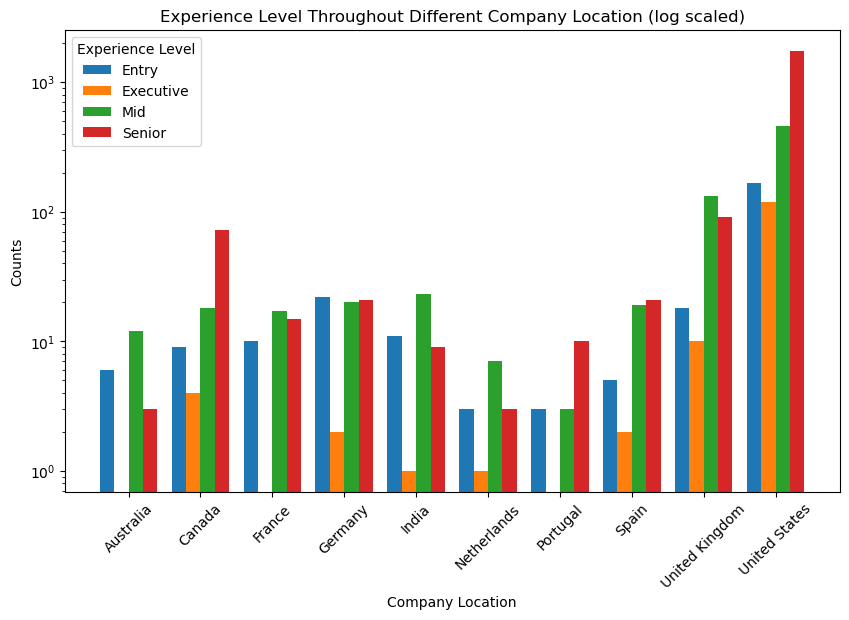

In [62]:
multi_bar_with_cat(experience_counts_by_loc,'Company Location','Experience Level', True)

#### How company sizes differ between location?

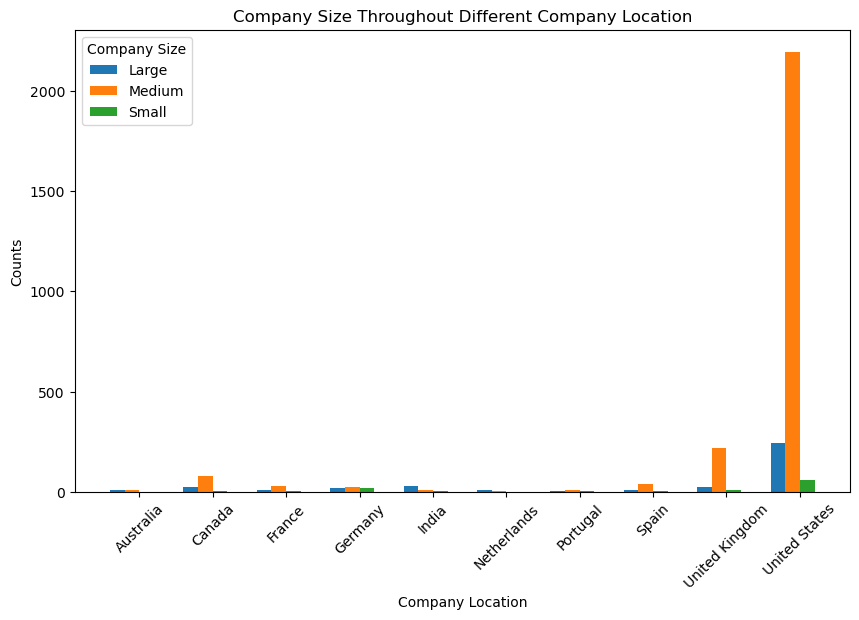

In [63]:
size_counts_by_loc = df.groupby(['Company Location', 'Company Size']).size().unstack(fill_value=0)
size_counts_by_loc = size_counts_by_loc[size_counts_by_loc.index.isin(top_10_loc.index)]

multi_bar_with_cat(size_counts_by_loc,'Company Location','Company Size')

In [64]:
size_counts_by_loc

Company Size      Large  Medium  Small
Company Location                      
Australia             9      11      1
Canada               22      78      4
France               10      27      5
Germany              21      26     18
India                30      10      4
Netherlands          11       2      1
Portugal              6       8      2
Spain                 7      38      2
United Kingdom       24     218      9
United States       243    2195     57

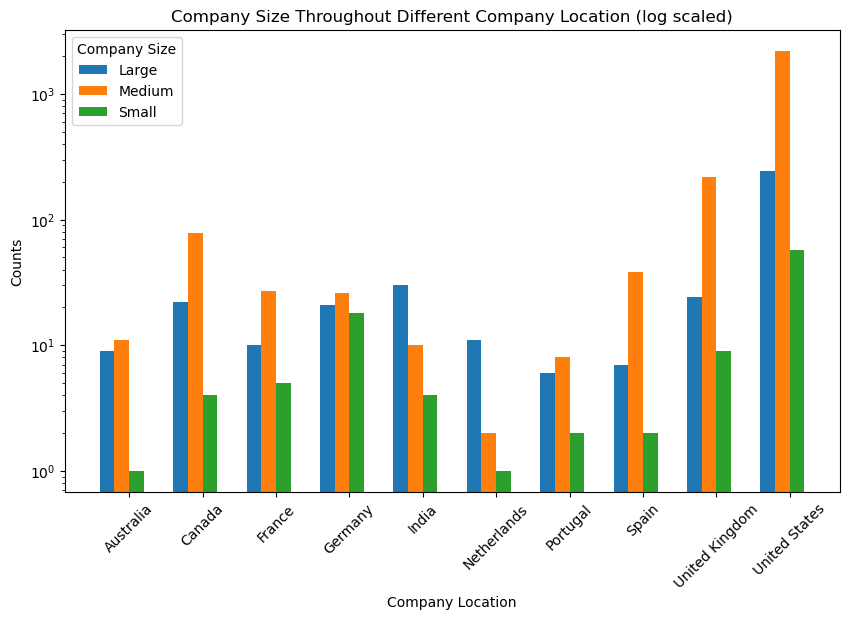

In [65]:
multi_bar_with_cat(size_counts_by_loc,'Company Location','Company Size',True)

### Employment Type

#### What is the proportion for each employment type? (overall and for each year)

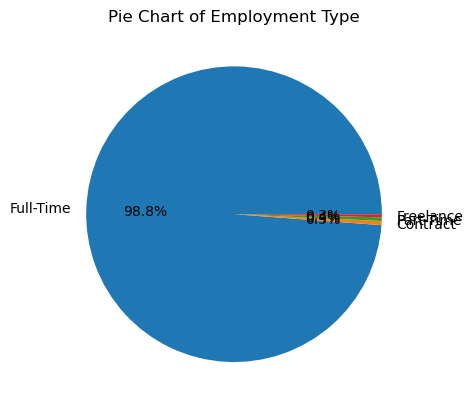

In [66]:
type_counts = df['Employment Type'].value_counts()
simple_pie(type_counts,'Employment Type')

In [67]:
type_counts

Full-Time    3261
Contract       15
Part-Time      13
Freelance      11
Name: Employment Type, dtype: int64

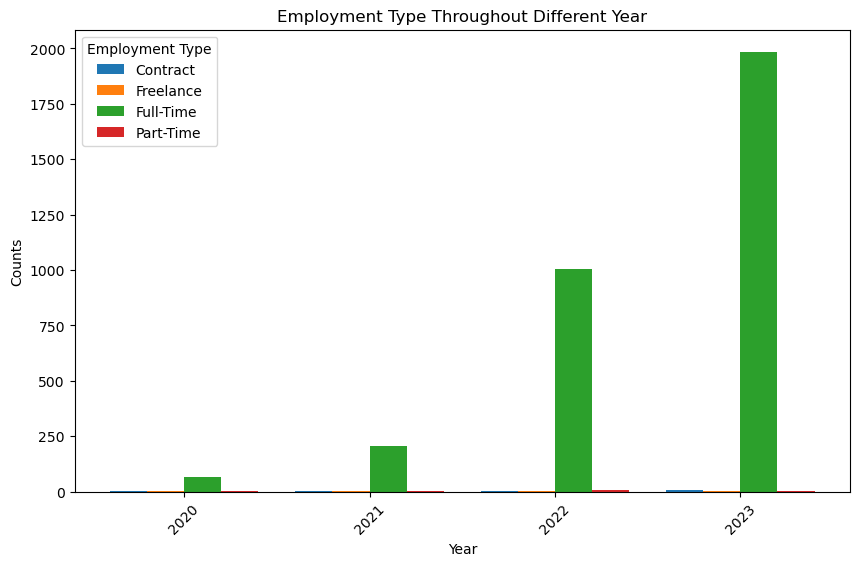

In [68]:
type_counts_by_year = df.groupby(['Year', 'Employment Type']).size().unstack(fill_value=0)
multi_bar_with_cat(type_counts_by_year,'Year','Employment Type')

In [69]:
type_counts_by_year

Employment Type  Contract  Freelance  Full-Time  Part-Time
Year                                                      
2020                    2          1         68          2
2021                    3          3        205          4
2022                    3          4       1003          6
2023                    7          3       1985          1

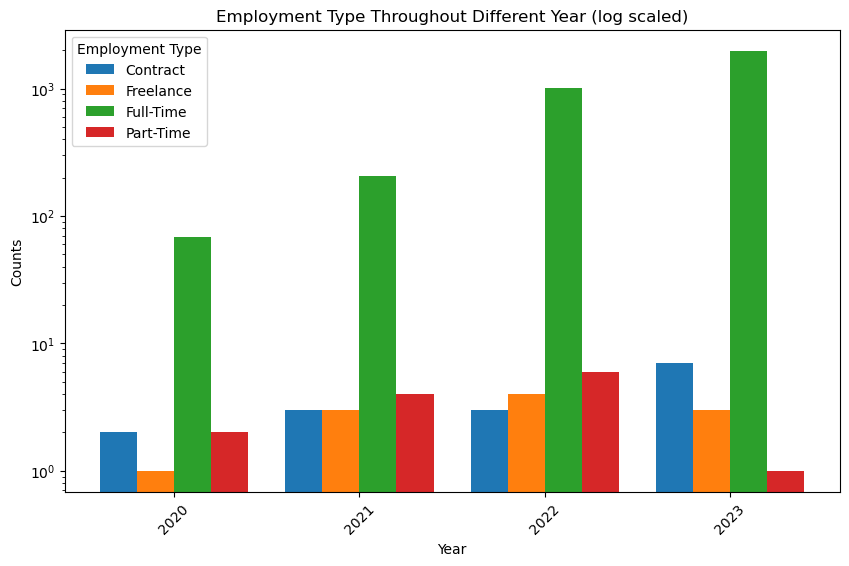

In [70]:
multi_bar_with_cat(type_counts_by_year,'Year','Employment Type',True)

#### How salary is different throughout different employment type?

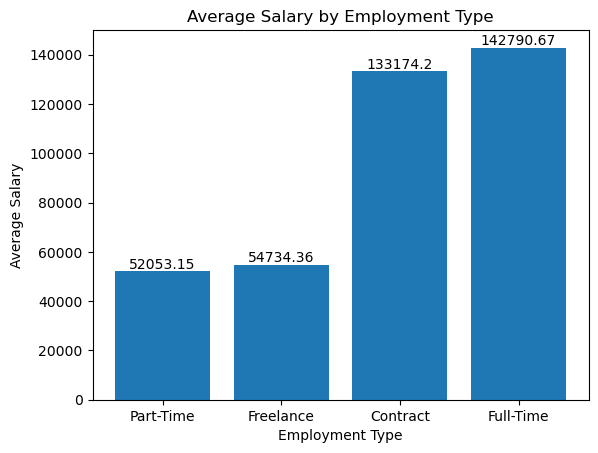

In [71]:
average_salary_with_info(df,'Employment Type')

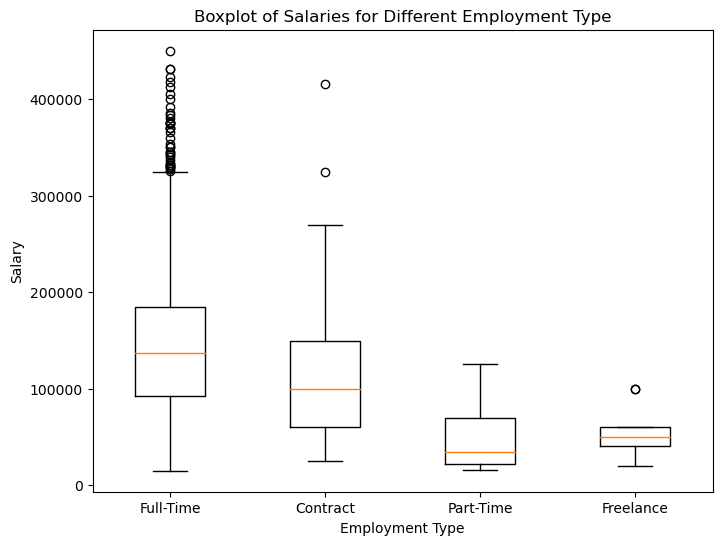

In [72]:
multiple_box_salaries(df,'Employment Type')

#### How different levels of experience distributed in different employment type?

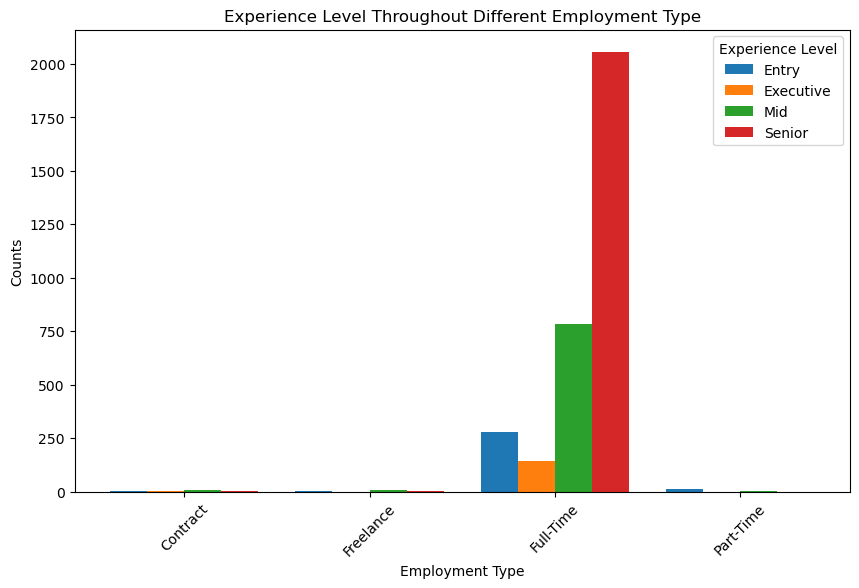

In [73]:
experience_counts_by_type = df.groupby(['Employment Type', 'Experience Level']).size().unstack(fill_value=0)
multi_bar_with_cat(experience_counts_by_type,'Employment Type','Experience Level')

In [74]:
experience_counts_by_type

Experience Level  Entry  Executive  Mid  Senior
Employment Type                                
Contract              3          1    7       4
Freelance             2          0    5       4
Full-Time           277        145  782    2057
Part-Time            10          0    3       0

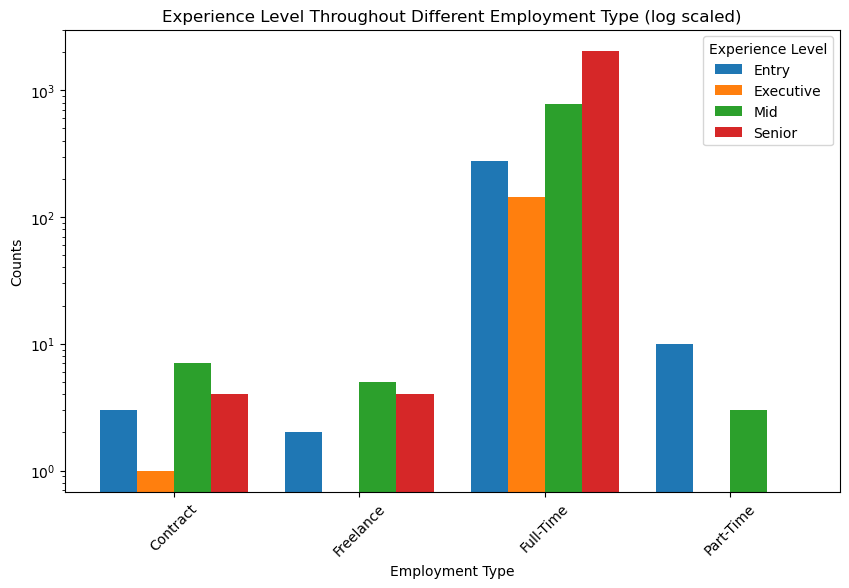

In [75]:
multi_bar_with_cat(experience_counts_by_type,'Employment Type','Experience Level',True)

#### What is the distribution of employment type for each different company size?

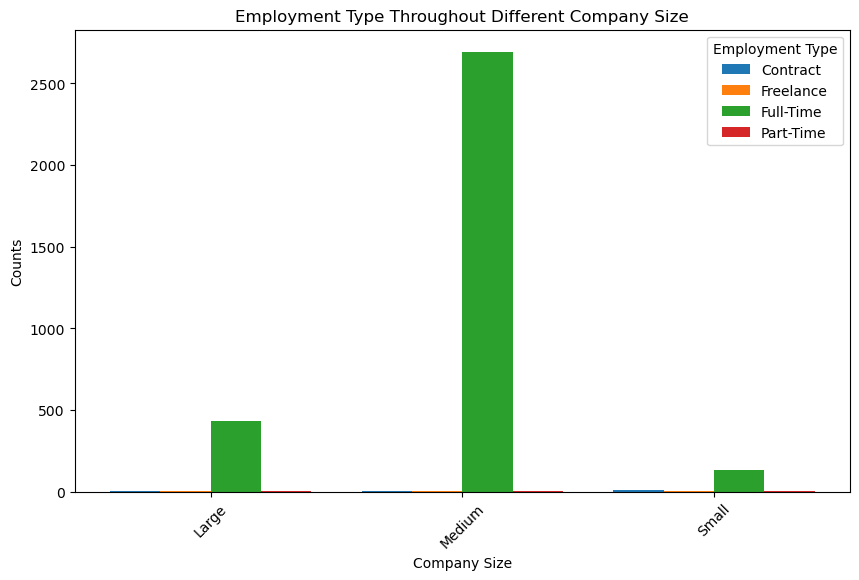

In [76]:
type_counts_by_size = df.groupby(['Company Size', 'Employment Type']).size().unstack(fill_value=0)
multi_bar_with_cat(type_counts_by_size,'Company Size','Employment Type')

In [77]:
type_counts_by_size

Employment Type  Contract  Freelance  Full-Time  Part-Time
Company Size                                              
Large                   3          1        433          5
Medium                  5          5       2694          3
Small                   7          5        134          5

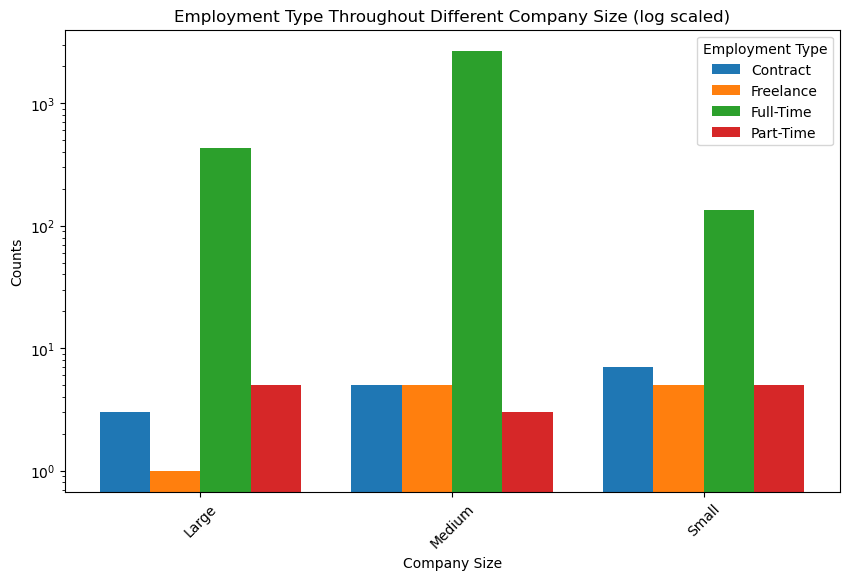

In [78]:
multi_bar_with_cat(type_counts_by_size,'Company Size','Employment Type',True)

### Job Title

#### How many data science employees are there for each title?

In [79]:
job_title = df['Job Title']

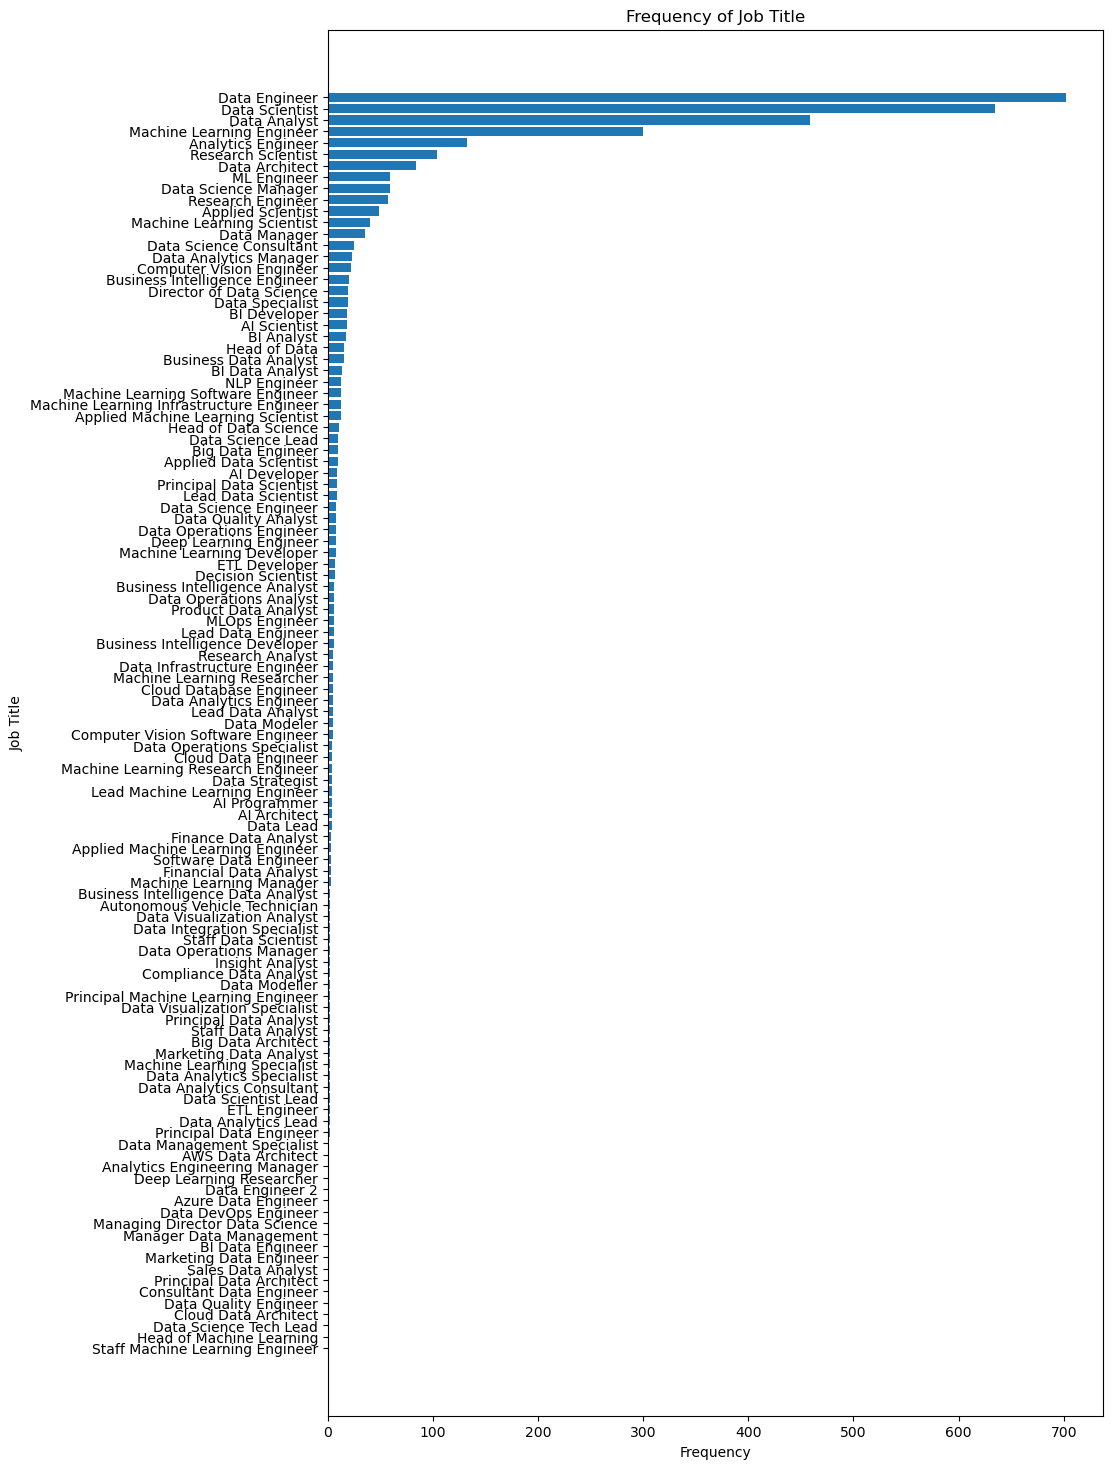

In [80]:
title_counts = job_title.value_counts().sort_values()

horizontal_bar(title_counts,'Job Title')

In [81]:
title_counts

Staff Machine Learning Engineer               1
Head of Machine Learning                      1
Data Science Tech Lead                        1
Cloud Data Architect                          1
Data Quality Engineer                         1
Consultant Data Engineer                      1
Principal Data Architect                      1
Sales Data Analyst                            1
Marketing Data Engineer                       1
BI Data Engineer                              1
Manager Data Management                       1
Managing Director Data Science                1
Data DevOps Engineer                          1
Azure Data Engineer                           1
Data Engineer 2                               1
Deep Learning Researcher                      1
Analytics Engineering Manager                 1
AWS Data Architect                            1
Data Management Specialist                    1
Principal Data Engineer                       2
Data Analytics Lead                     

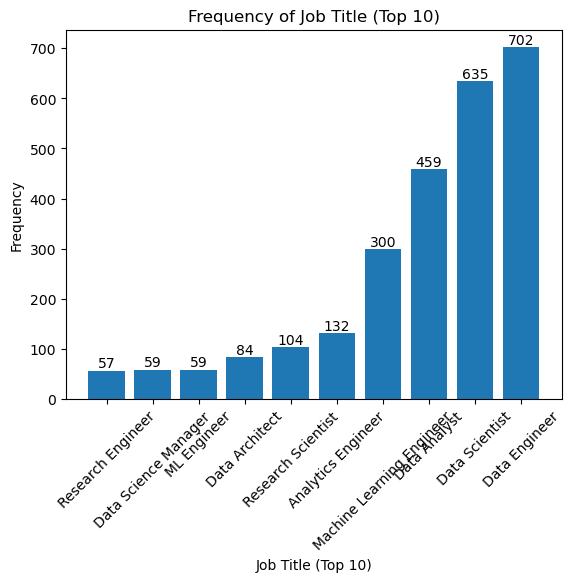

In [82]:
# Top 10 Title
top_10_title = title_counts.tail(10)
bar_with_info(top_10_title,'Job Title (Top 10)')

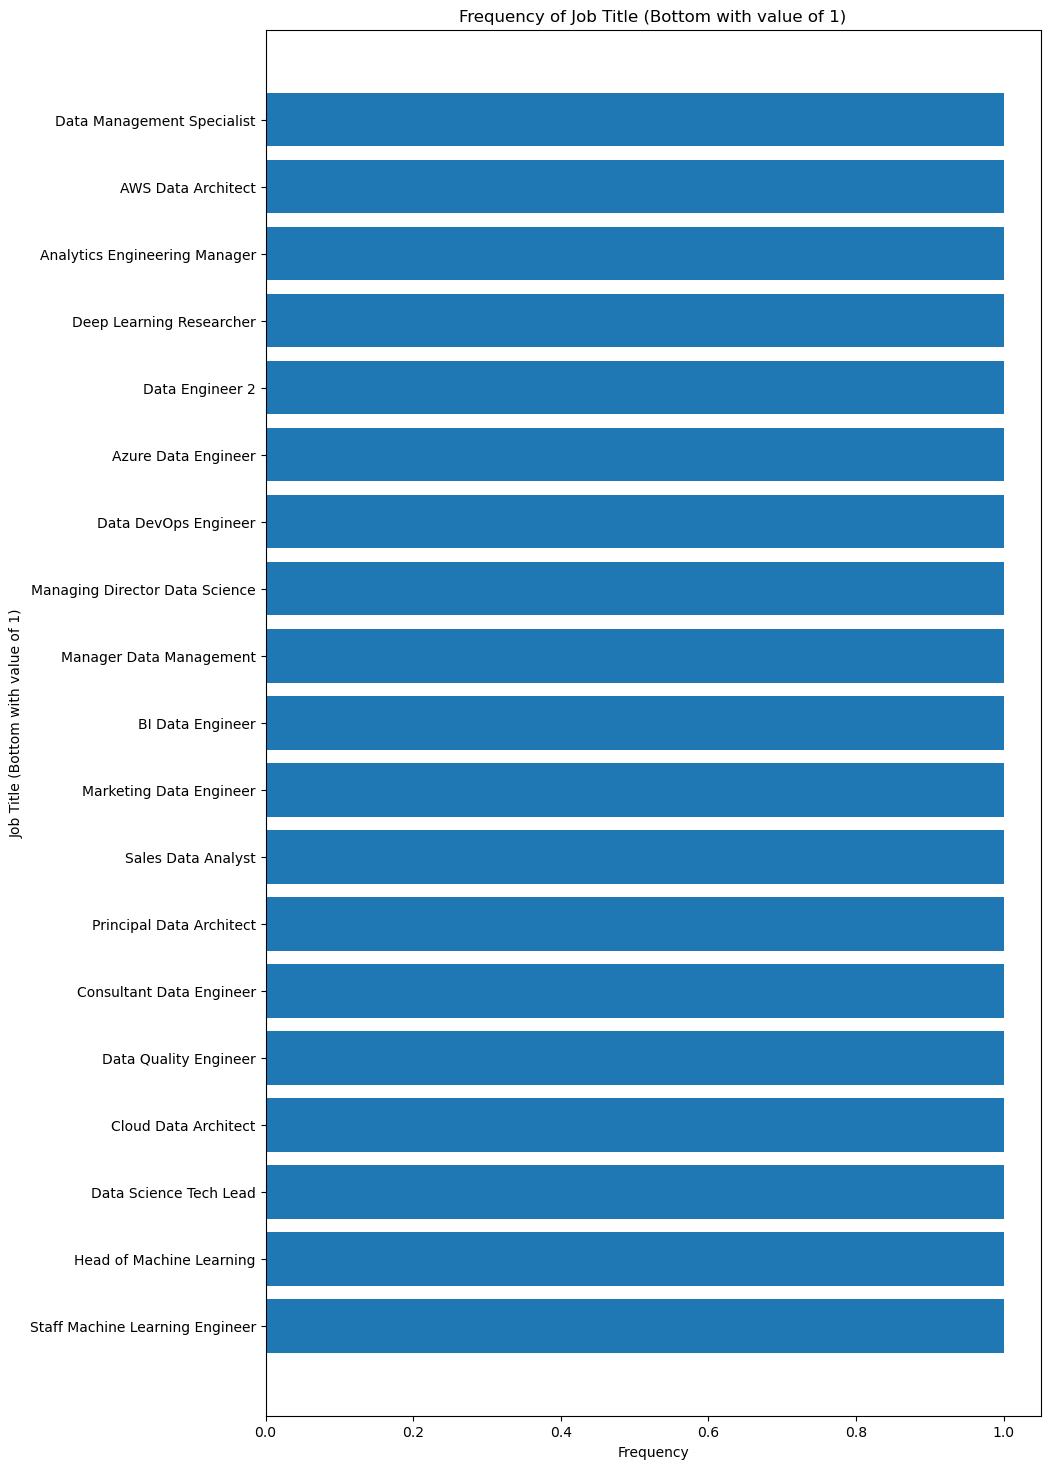

In [83]:
# Bottom Title
bot_title = title_counts.loc[lambda x : x == 1]
horizontal_bar(bot_title,'Job Title (Bottom with value of 1)')

#### How salary is different throughout different job title?

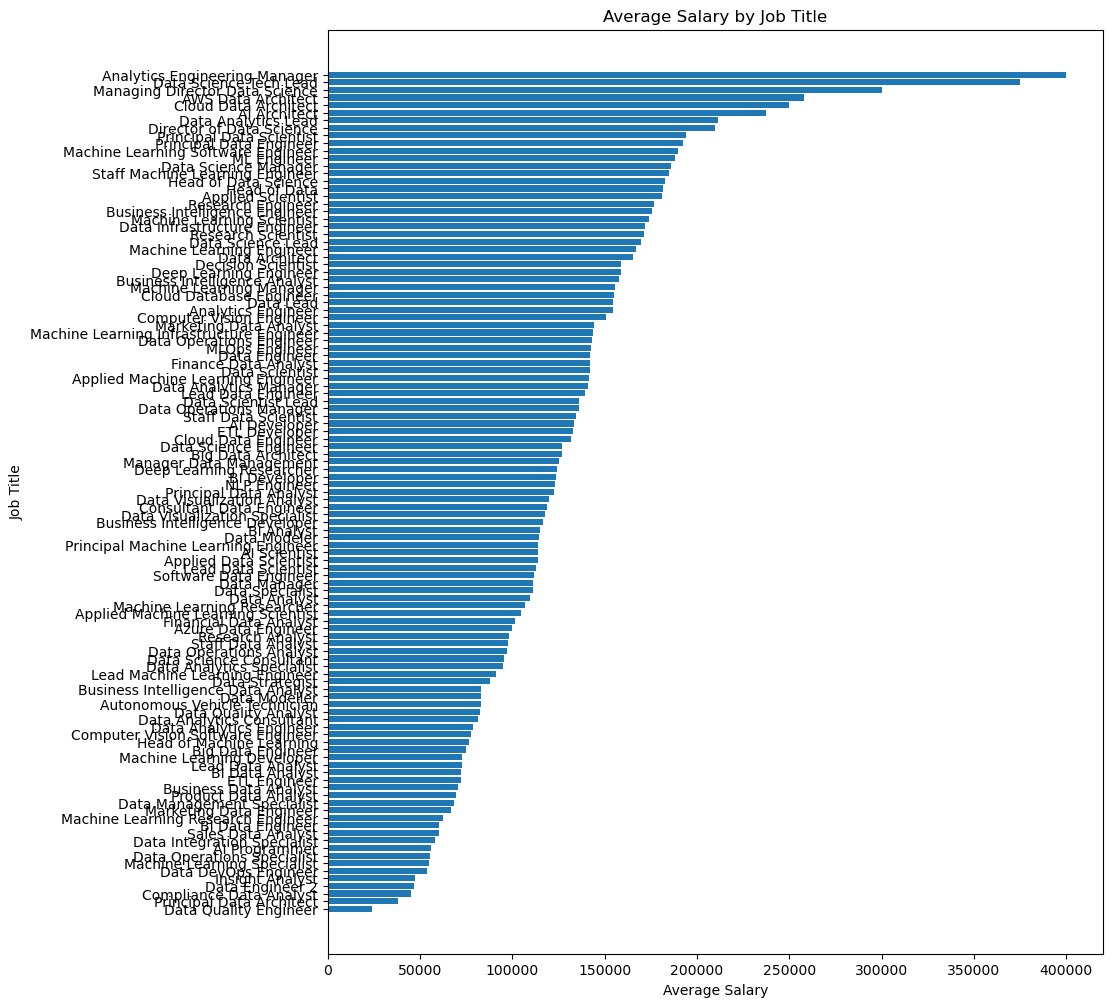

In [84]:
grouped_data = df.groupby('Job Title')['Salary'].mean().reset_index().sort_values(by="Salary")

horizontal_bar_salary(grouped_data,'Job Title')

In [85]:
grouped_data

Job Title         Salary
53                      Data Quality Engineer   23753.000000
98                   Principal Data Architect   38154.000000
27                    Compliance Data Analyst   45000.000000
40                            Data Engineer 2   46565.000000
76                            Insight Analyst   47370.000000
38                       Data DevOps Engineer   53984.000000
91                Machine Learning Specialist   55000.000000
51                 Data Operations Specialist   55355.000000
2                               AI Programmer   56021.750000
42                Data Integration Specialist   57950.000000
106                        Sales Data Analyst   60000.000000
15                           BI Data Engineer   60000.000000
87         Machine Learning Research Engineer   62504.000000
95                    Marketing Data Engineer   66970.000000
44                 Data Management Specialist   68293.000000
102                      Product Data Analyst   69436.166667
19                      Business Data Analyst   70729.800000
70                               ETL Engineer   72286.000000
14                            BI Data Analyst   72389.357143
77                          Lead Data Analyst   72570.000000
83                 Machine Learning Developer   72703.500000
18                          Big Data Engineer   74980.600000
75                   Head of Machine Learning   76309.000000
29          Computer Vision Software Engineer   77760.600000
33                    Data Analytics Engineer   78839.400000
32                  Data Analytics Consultant   81500.000000
52                       Data Quality Analyst   82397.500000
11              Autonomous Vehicle Technician   82777.500000
47                              Data Modeller   83052.000000
21         Business Intelligence Data Analyst   83209.500000
62                            Data Strategist   88000.000000
80             Lead Machine Learning Engineer   90945.750000
36                  Data Analytics Specialist   95000.000000
54                    Data Science Consultant   95250.920000
48                    Data Operations Analyst   97208.333333
108                        Staff Data Analyst   97499.000000
103                          Research Analyst   98036.200000
12                        Azure Data Engineer  100000.000000
72                     Financial Data Analyst  101666.666667
9          Applied Machine Learning Scientist  104795.538462
88                Machine Learning Researcher  107047.200000
31                               Data Analyst  109500.376906
61                            Data Specialist  111236.842105
45                               Data Manager  111402.085714
107                    Software Data Engineer  111627.666667
79                        Lead Data Scientist  112775.555556
7                      Applied Data Scientist  113658.300000
3                                AI Scientist  114117.333333
101       Principal Machine Learning Engineer  114145.000000
46                               Data Modeler  114460.800000
13                                 BI Analyst  114842.411765
22            Business Intelligence Developer  116850.000000
64              Data Visualization Specialist  117500.000000
30                   Consultant Data Engineer  118539.000000
63                 Data Visualization Analyst  120000.000000
97                     Principal Data Analyst  122500.000000
96                               NLP Engineer  123079.538462
16                               BI Developer  123499.777778
67                   Deep Learning Researcher  124163.000000
92                    Manager Data Management  125000.000000
17                         Big Data Architect  126751.000000
55                      Data Science Engineer  126948.000000
25                        Cloud Data Engineer  131617.750000
69                              ETL Developer  133121.857143
1                                AI Developer  133177.777778
109       

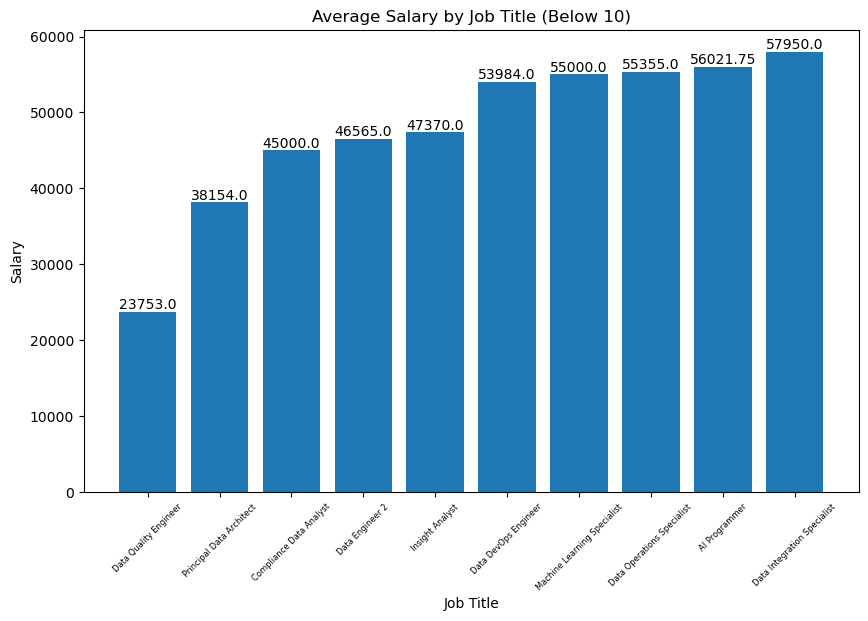

In [86]:
# BELOW 10
grouped = grouped_data.sort_values(by="Salary").head(10)
bar_with_group_data(grouped,'Job Title','Salary','Average Salary by Job Title (Below 10)')

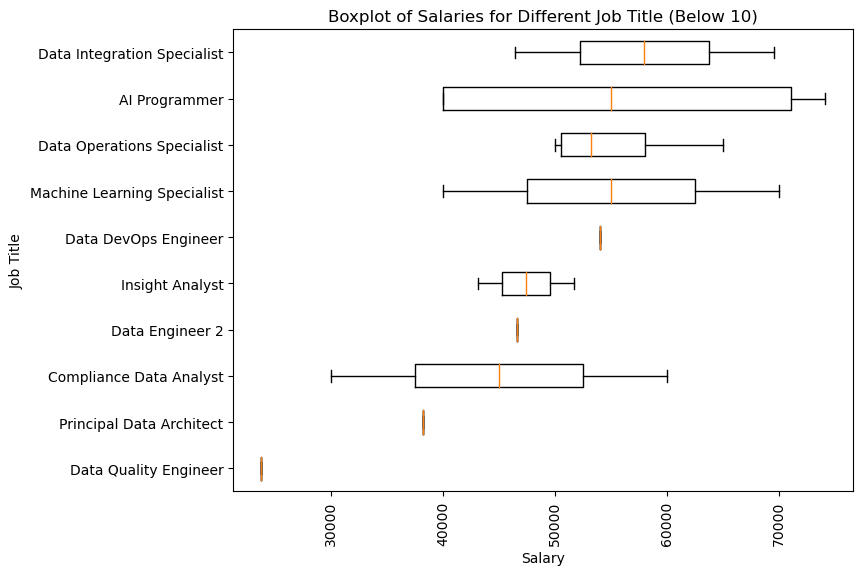

In [87]:
horizontal_box_group_salaries(df,grouped,'Job Title','Boxplot of Salaries for Different Job Title (Below 10)')

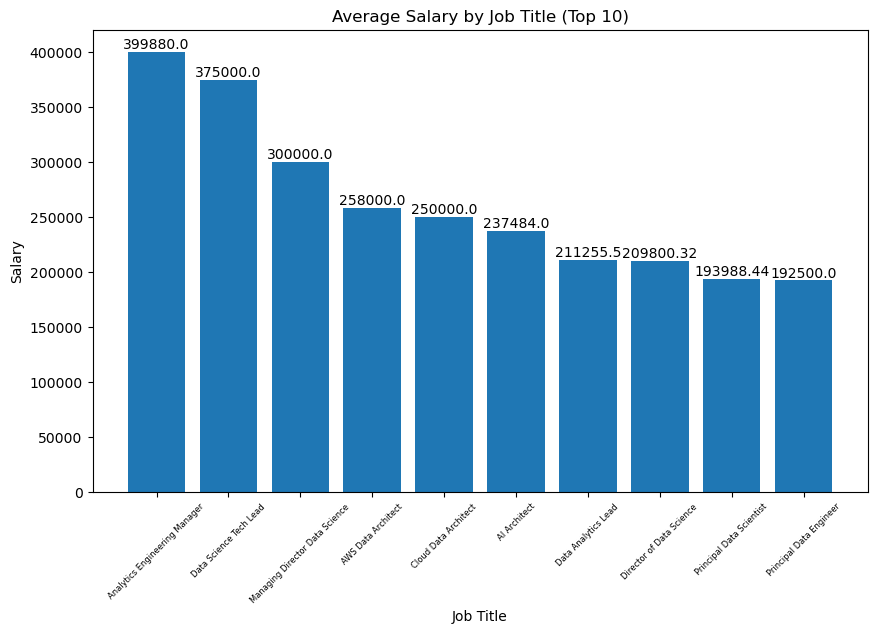

In [88]:
# UPPER 10
grouped = grouped_data.sort_values(by="Salary",ascending=False).head(10)
bar_with_group_data(grouped,'Job Title','Salary','Average Salary by Job Title (Top 10)')

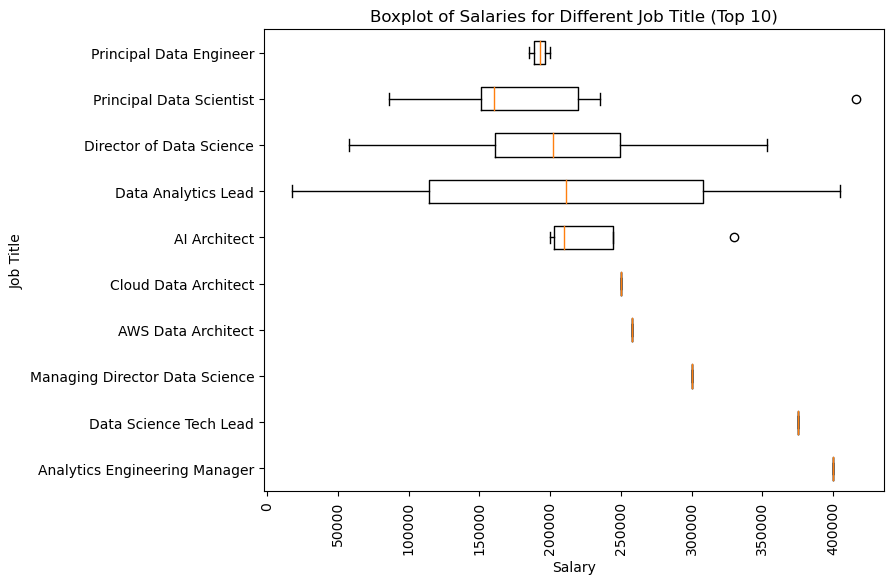

In [89]:
horizontal_box_group_salaries(df,grouped,'Job Title','Boxplot of Salaries for Different Job Title (Top 10)')

### Correlation between Features

In [90]:
# Encode Ordinal Data
from sklearn.preprocessing import OrdinalEncoder

encoded = df.copy()
company_size_order = ['Small', 'Medium', 'Large']
experience_level_order = ['Entry', 'Mid', 'Senior','Executive']

encoder = OrdinalEncoder(categories=[company_size_order])
encoded['Company Size'] = encoder.fit_transform(encoded[['Company Size']])
encoder = OrdinalEncoder(categories=[experience_level_order])
encoded['Experience Level'] = encoder.fit_transform(encoded[['Experience Level']])

encoded

Job Title Employment Type  \
0                                Data Engineer       Full-Time   
1                                Data Engineer       Full-Time   
2                                Data Engineer       Full-Time   
3                                Data Engineer       Full-Time   
4                               Data Scientist       Full-Time   
5                               Data Scientist       Full-Time   
6                               Data Scientist       Full-Time   
7                               Data Scientist       Full-Time   
8                                Data Engineer       Full-Time   
9                                Data Engineer       Full-Time   
10                          Analytics Engineer       Full-Time   
11                          Analytics Engineer       Full-Time   
12                               Data Engineer       Full-Time   
13                               Data Engineer       Full-Time   
14             Business Intelligence Developer       Full-Time   
15             Business Intelligence Developer       Full-Time   
16                              Data Scientist       Full-Time   
17                              Data Scientist       Full-Time   
18                              Data Scientist       Full-Time   
19                              Data Scientist       Full-Time   
20                   Machine Learning Engineer       Full-Time   
21                   Machine Learning Engineer       Full-Time   
22                                Data Analyst       Full-Time   
23                                Data Analyst       Full-Time   
24                   Machine Learning Engineer       Full-Time   
25                   Machine Learning Engineer       Full-Time   
26                   Machine Learning Engineer       Full-Time   
27                   Machine Learning Engineer       Full-Time   
28                          Decision Scientist       Full-Time   
29                          Decision Scientist       Full-Time   
30          Machine Learning Software Engineer       Full-Time   
31                                BI Developer       Full-Time   
32                                BI Developer       Full-Time   
33                  Machine Learning Scientist       Full-Time   
34                  Machine Learning Scientist       Full-Time   
35                                  BI Analyst       Full-Time   
36                                  BI Analyst       Full-Time   
37                                Data Manager       Full-Time   
38                                Data Manager       Full-Time   
39                               Data Engineer       Full-Time   
40                               Data Engineer       Full-Time   
41                   Machine Learning Engineer       Full-Time   
42                   Machine Learning Engineer       Full-Time   
43                                  BI Analyst       Full-Time   
44                                  BI Analyst       Full-Time   
45                               Data Engineer       Full-Time   
46                               Data Engineer       Full-Time   
47              Business Intelligence Engineer       Full-Time   
48              Business Intelligence Engineer       Full-Time   
49                              Data Scientist       Full-Time   
50                              Data Scientist       Full-Time   
51                   Machine Learning Engineer       Full-Time   
52                   Machine Learning Engineer       Full-Time   
53                                Data Analyst       Full-Time   
54                                Data Analyst       Full-Time   
55                                 ML Engineer       Full-Time   
56                                 ML Engineer       Full-Time   
57              Business Intelligence Engineer       Full-Time   
58              Business Intelligence Engineer       Full-Time   
59                               Data Engineer       Full-Time   
60         

In [91]:
# Encode Categorical Data
import category_encoders as ce

In [92]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()

In [93]:
feature_list = list(encoded.columns)
feature_list

['Job Title',
 'Employment Type',
 'Experience Level',
 'Company Location',
 'Salary',
 'Company Size',
 'Year']

In [94]:
encoded = cbe_encoder.fit_transform(encoded[feature_list], encoded[feature_list[-1]])

In [95]:
encoded

Job Title  Employment Type  Experience Level  Company Location  \
0     2022.495455      2022.495455               2.0       2022.495455   
1     2022.747727      2022.747727               2.0       2022.747727   
2     2022.831818      2022.831818               2.0       2022.831818   
3     2022.873864      2022.873864               2.0       2022.873864   
4     2022.495455      2022.899091               2.0       2022.899091   
5     2022.747727      2022.915909               2.0       2022.915909   
6     2022.831818      2022.927922               2.0       2022.927922   
7     2022.873864      2022.936932               2.0       2022.936932   
8     2022.899091      2022.943939               1.0       2022.495455   
9     2022.915909      2022.949545               1.0       2022.747727   
10    2022.495455      2022.954132               2.0       2022.943939   
11    2022.747727      2022.957955               2.0       2022.949545   
12    2022.927922      2022.961189               2.0       2022.495455   
13    2022.936932      2022.963961               2.0       2022.495455   
14    2022.495455      2022.966364               2.0       2022.954132   
15    2022.747727      2022.968466               2.0       2022.957955   
16    2022.899091      2022.970321               2.0       2022.961189   
17    2022.915909      2022.971970               2.0       2022.963961   
18    2022.927922      2022.973445               2.0       2022.966364   
19    2022.936932      2022.974773               2.0       2022.968466   
20    2022.495455      2022.975974               2.0       2022.970321   
21    2022.747727      2022.977066               2.0       2022.971970   
22    2022.495455      2022.978063               2.0       2022.973445   
23    2022.747727      2022.978977               2.0       2022.974773   
24    2022.831818      2022.979818               2.0       2022.975974   
25    2022.873864      2022.980594               2.0       2022.977066   
26    2022.899091      2022.981313               2.0       2022.978063   
27    2022.915909      2022.981981               2.0       2022.978977   
28    2022.495455      2022.982602               2.0       2022.979818   
29    2022.747727      2022.983182               2.0       2022.980594   
30    2022.495455      2022.983724               1.0       2022.495455   
31    2022.495455      2022.984233               2.0       2022.981313   
32    2022.747727      2022.984711               2.0       2022.981981   
33    2022.495455      2022.985160               2.0       2022.831818   
34    2022.747727      2022.985584               2.0       2022.873864   
35    2022.495455      2022.985985               2.0       2022.982602   
36    2022.747727      2022.986364               2.0       2022.983182   
37    2022.495455      2022.986722               2.0       2022.983724   
38    2022.747727      2022.987063               2.0       2022.984233   
39    2022.943939      2022.987386               2.0       2022.899091   
40    2022.949545      2022.987694               2.0       2022.915909   
41    2022.927922      2022.987987               2.0       2022.984711   
42    2022.936932      2022.988266               2.0       2022.985160   
43    2022.831818      2022.988533               2.0       2022.985584   
44    2022.873864      2022.988788               2.0       2022.985985   
45    2022.954132      2022.989032               2.0       2022.986364   
46    2022.957955      2022.989265               2.0       2022.986722   
47    2022.495455      2022.989489               3.0       2022.987063   
48    2022.747727      2022.989703               3.0       2022.987386   
49    2022.943939      2022.989909               1.0       2022.927922   
50    2022.949545      2022.990107               1.0       2022.936932   
51    2022.943939      2022.990297               2.0       2022.987694   
52    2022.949545      2022.990480               2.0       2022.987987   
53    2022.8

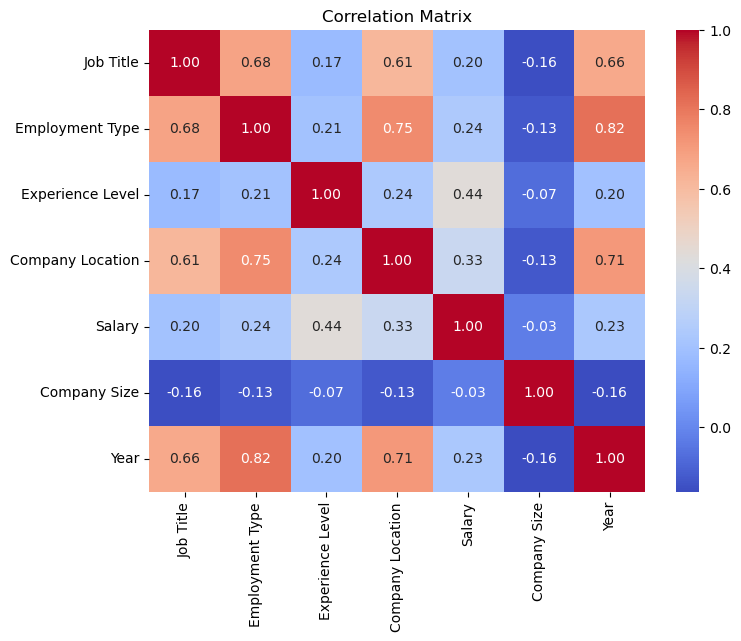

In [96]:
correlation_matrix = encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Regression Modal to Predict Salary

### Data Preparation and Processing

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [98]:
df.columns

Index(['Job Title', 'Employment Type', 'Experience Level', 'Company Location',
       'Salary', 'Company Size', 'Year'],
      dtype='object')

In [99]:
# Remove outliers
processed_df = df[(salary<upper_limit) & (salary>lower_limit)]

In [100]:
features = processed_df[["Job Title", "Employment Type","Experience Level","Company Location","Company Size",
              "Year"]]

In [101]:
# Convert categorical variables into numerical representations using one-hot encoding
categorical_features = ["Job Title", "Employment Type","Experience Level",
                        "Company Location","Company Size"]

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)],
                                 remainder='passthrough')
X = preprocessor.fit_transform(features)

# Target variable (salary)
y = processed_df["Salary"]

In [102]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
print('X_train Shape: ',X_train.shape)
print('y_train Shape: ',y_train.shape)
print('X_test Shape: ',X_test.shape)
print('y_test Shape: ',y_test.shape)

X_train Shape:  (2620, 192)
y_train Shape:  (2620,)
X_test Shape:  (655, 192)
y_test Shape:  (655,)


### Linear Regression

In [104]:
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train, y_train)

y_pred = linearRegression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2444887547.3014655
Mean Absolute Error (MAE): 38115.934384127795
R-squared (R2): 0.4081057415348798


In [105]:
# Predict salaries for the test set (X_test)
test_set_predictions = linearRegression_model.predict(X_test)

predictions_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': test_set_predictions})
print(predictions_df)

      Actual Salary  Predicted Salary
2363          43096     117748.179690
1219         275300     173509.291160
1514         128000     105289.431324
291          269500     196163.383022
488          316000     173509.291160
466          150000     196163.383022
289          134200      99323.695699
139          145900     194564.563299
2085          24165      -3924.075335
511          146190     139246.238936
2968         109280     153541.238049
1267          30000     -18750.004837
3070          62649      90061.274604
810           81800      99323.695699
1484         124500     167233.689898
451          250000     194564.563299
3263          76833      88507.444473
2924          61300     113961.568149
670          151000     167500.726928
2567         132100     157335.726969
482          283780     196163.383022
3040          77364     110206.612607
1588         143000     217280.151302
1672         125000     147726.625899
2787          30523     -77066.202014
238         

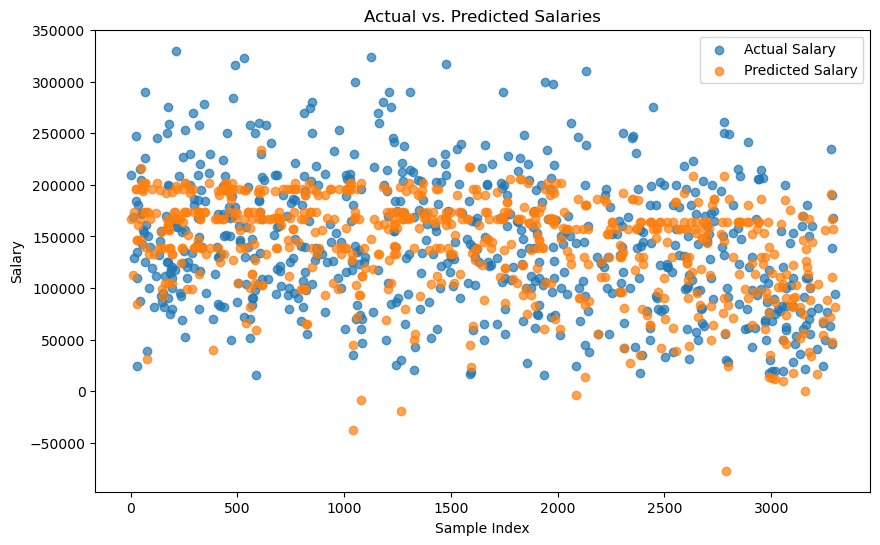

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df.index, predictions_df['Actual Salary'], label='Actual Salary', alpha=0.7)
plt.scatter(predictions_df.index, predictions_df['Predicted Salary'], label='Predicted Salary', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()

### Random Forest Regression

In [107]:
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
randomForest_model.fit(X_train, y_train)

y_pred = randomForest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2422567278.5344563
Mean Absolute Error (MAE): 37776.02993086128
R-squared (R2): 0.4135093597688444


In [108]:
# Predict salaries for the test set (X_test)
test_set_predictions = randomForest_model.predict(X_test)

predictions_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': test_set_predictions})
print(predictions_df)

      Actual Salary  Predicted Salary
2363          43096      87918.667734
1219         275300     173811.975217
1514         128000     111876.865622
291          269500     203162.538928
488          316000     173811.975217
466          150000     203162.538928
289          134200     143277.692640
139          145900     175437.945435
2085          24165      46070.476835
511          146190     129595.536719
2968         109280     160461.725849
1267          30000      45858.820358
3070          62649      69283.289921
810           81800     143277.692640
1484         124500     172389.752521
451          250000     175437.945435
3263          76833      95471.296188
2924          61300     142252.840617
670          151000     172738.706492
2567         132100     159944.244105
482          283780     203162.538928
3040          77364      67160.438148
1588         143000     173296.861074
1672         125000      92810.879883
2787          30523      22773.106489
238         

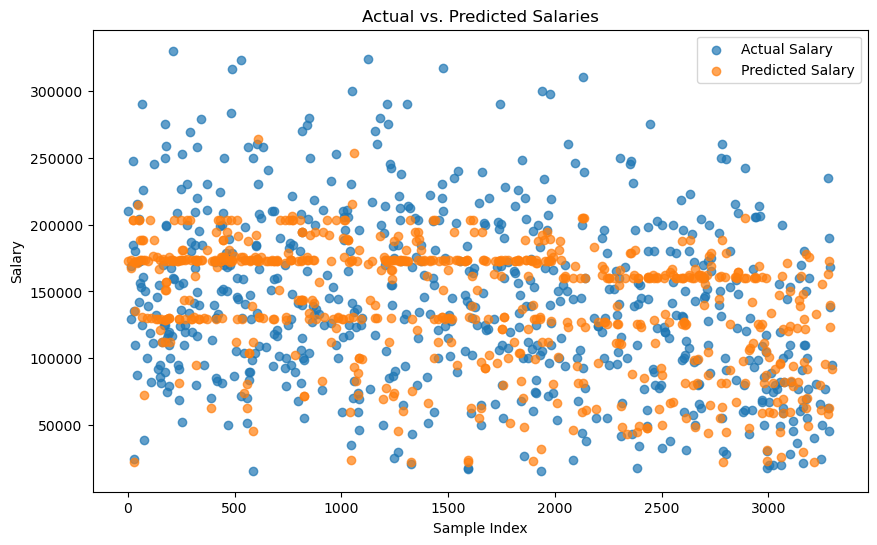

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df.index, predictions_df['Actual Salary'], label='Actual Salary', alpha=0.7)
plt.scatter(predictions_df.index, predictions_df['Predicted Salary'], label='Predicted Salary', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()

### Decision Tree Regression

In [110]:
decisionTree_model = DecisionTreeRegressor(max_depth=10,random_state=42)
decisionTree_model.fit(X_train, y_train)

y_pred = decisionTree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2616263800.3688183
Mean Absolute Error (MAE): 38984.92324628893
R-squared (R2): 0.36661646308532836


In [111]:
# Predict salaries for the test set (X_test)
test_set_predictions = decisionTree_model.predict(X_test)

predictions_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': test_set_predictions})
print(predictions_df)

      Actual Salary  Predicted Salary
2363          43096      82620.636364
1219         275300     174607.885370
1514         128000     111091.290323
291          269500     203440.940000
488          316000     174607.885370
466          150000     203440.940000
289          134200     146846.090909
139          145900     174607.885370
2085          24165      47511.506329
511          146190     130664.426087
2968         109280     158938.655462
1267          30000      47511.506329
3070          62649      60609.206349
810           81800     146846.090909
1484         124500     174607.885370
451          250000     174607.885370
3263          76833      99721.000000
2924          61300     141385.647059
670          151000     174607.885370
2567         132100     158938.655462
482          283780     203440.940000
3040          77364      60609.206349
1588         143000     174607.885370
1672         125000      30000.000000
2787          30523      18637.666667
238         

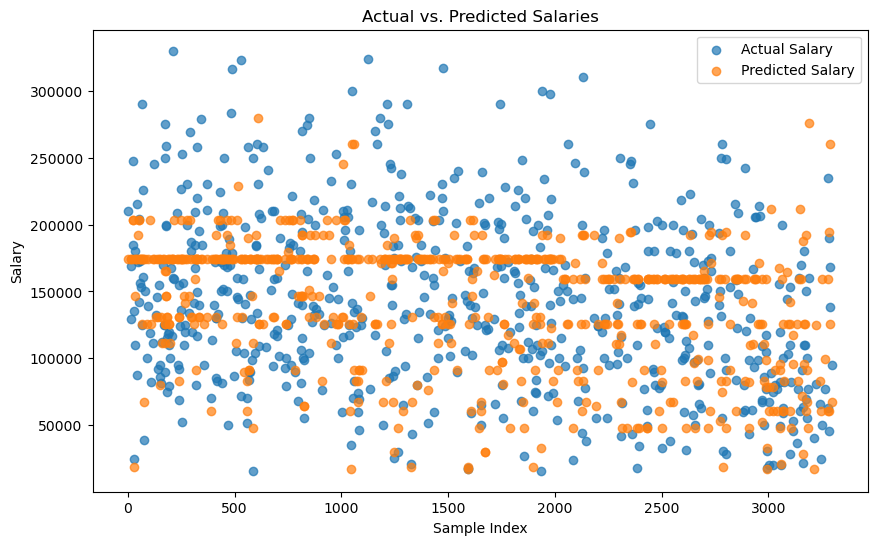

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df.index, predictions_df['Actual Salary'], label='Actual Salary', alpha=0.7)
plt.scatter(predictions_df.index, predictions_df['Predicted Salary'], label='Predicted Salary', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()

### Gradient Boosting Regression

In [113]:
gradientBoosting_model = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)
gradientBoosting_model.fit(X_train, y_train)

y_pred = gradientBoosting_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2344481668.675607
Mean Absolute Error (MAE): 37460.566702748576
R-squared (R2): 0.432413470182926


In [114]:
# Predict salaries for the test set (X_test)
test_set_predictions = gradientBoosting_model.predict(X_test)

predictions_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': test_set_predictions})
print(predictions_df)

      Actual Salary  Predicted Salary
2363          43096      87086.199481
1219         275300     176760.715535
1514         128000     111200.121569
291          269500     202500.550913
488          316000     176760.715535
466          150000     202500.550913
289          134200     146033.961110
139          145900     180411.522747
2085          24165      38970.586442
511          146190     131353.651178
2968         109280     152373.641086
1267          30000      35667.663354
3070          62649      77895.610280
810           81800     146033.961110
1484         124500     169660.754345
451          250000     180411.522747
3263          76833      93921.637074
2924          61300     142903.855048
670          151000     169074.484222
2567         132100     157193.747378
482          283780     202500.550913
3040          77364      61648.714507
1588         143000     185917.492728
1672         125000     107717.928903
2787          30523       4577.946808
238         

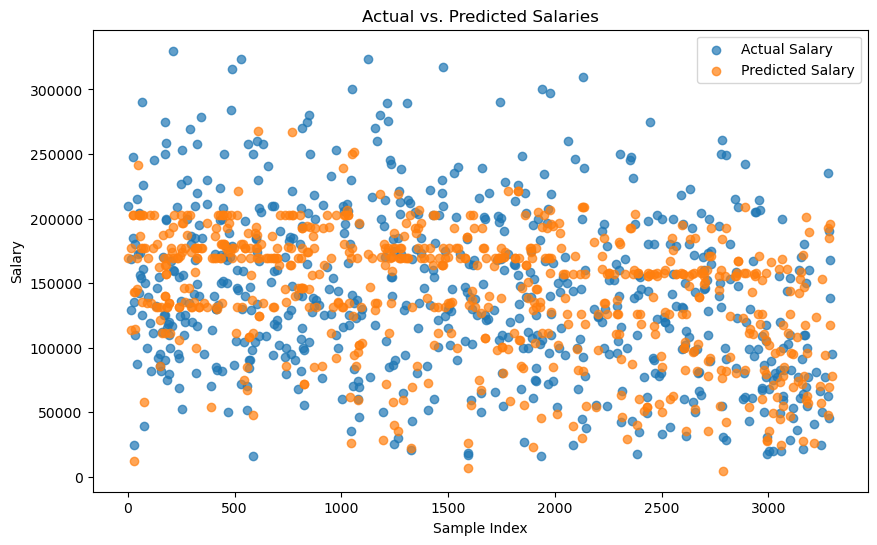

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df.index, predictions_df['Actual Salary'], label='Actual Salary', alpha=0.7)
plt.scatter(predictions_df.index, predictions_df['Predicted Salary'], label='Predicted Salary', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.show()

### Cross Validation

In [116]:
from sklearn.model_selection import KFold

In [117]:
# Define the number of folds for cross-validation
num_folds = 5

# Define the K-fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [118]:
# Initialize model
linearRegression_model = LinearRegression()
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
decisionTree_model = DecisionTreeRegressor(max_depth=10,random_state=42)
gradientBoosting_model = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)

In [119]:
models = [linearRegression_model,randomForest_model,decisionTree_model,gradientBoosting_model]
names = ['Linear','Random Forest','Decision Tree','Gradient Boosting']
mse_all = []
mae_all = []
r2_all = []    

In [120]:
type(X)

scipy.sparse._csr.csr_matrix

In [121]:
# transform scipy matrix to array for k_fold
X_fold = X.toarray()

In [122]:
print('X_fold Shape: ',X_fold.shape)
print('y Shape: ', y.shape)

X_fold Shape:  (3275, 192)
y Shape:  (3275,)


In [123]:
for model in models:
    mse_model = []
    mae_model = []
    r2_model = []

    for train_index, test_index in kf.split(X_fold):
        X_train_fold, X_test_fold = X_fold[train_index], X_fold[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]


        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)  
        
        mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
        mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
        r2_fold = r2_score(y_test_fold, y_pred_fold)
        
        mse_model.append(mse_fold)
        mae_model.append(mae_fold)
        r2_model.append(r2_fold)
        
    mse_all.append(mse_model)
    mae_all.append(mae_model)
    r2_all.append(r2_model)

In [124]:
index = 0

average_mse = []
average_mae = []
average_r2 = []

for i in range(len(names)):
    average_mse.append(np.mean(mse_all[i]))
    average_mae.append(np.mean(mae_all[i]))
    average_r2.append(np.mean(r2_all[i]))
    
    print('Model: ',names[i])
    print("Average Mean Squared Error (MSE):", np.mean(mse_all[i]))
    print("Average Mean Absolute Error (MAE):", np.mean(mae_all[i]))
    print("Average R-squared (R2):", np.mean(r2_all[i]))
    print()

Model:  Linear
Average Mean Squared Error (MSE): 1.4374941897172935e+34
Average Mean Absolute Error (MAE): 9688421537526324.0
Average R-squared (R2): -3.229207885908484e+24

Model:  Random Forest
Average Mean Squared Error (MSE): 2514268837.9756517
Average Mean Absolute Error (MAE): 38767.805048367125
Average R-squared (R2): 0.41686531719869874

Model:  Decision Tree
Average Mean Squared Error (MSE): 2677114458.323282
Average Mean Absolute Error (MAE): 39859.07801438607
Average R-squared (R2): 0.37921431464081834

Model:  Gradient Boosting
Average Mean Squared Error (MSE): 2484608178.5685854
Average Mean Absolute Error (MAE): 38674.38139871184
Average R-squared (R2): 0.42427336320559095



In [125]:
def plot_average_metrics(names,average_metrics,title,scale=False):
    plt.figure(figsize=(10, 6))
    plt.bar(names, average_metrics)
    plt.xlabel('Models')
    plt.ylabel('Values')
    
    if(scale):
        plt.yscale('log')
        
    plt.title(title)
    plt.show()

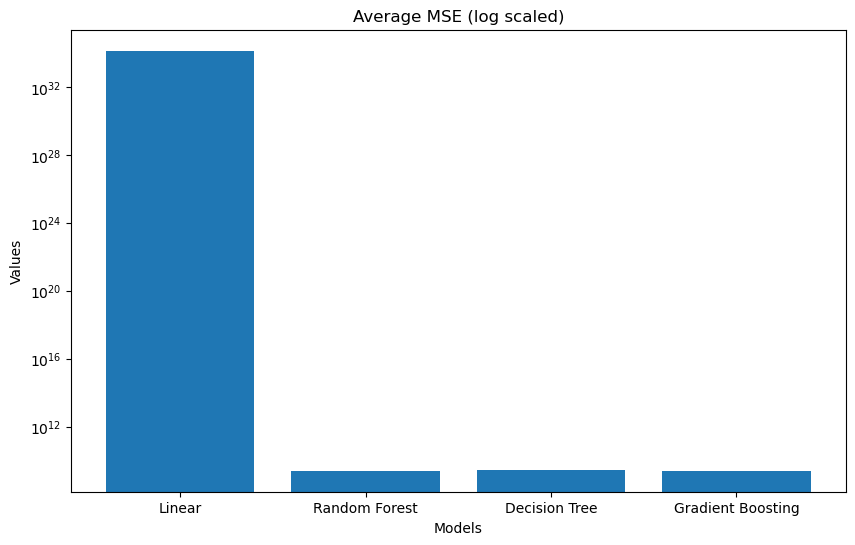

In [126]:
plot_average_metrics(names,average_mse,'Average MSE (log scaled)',True)

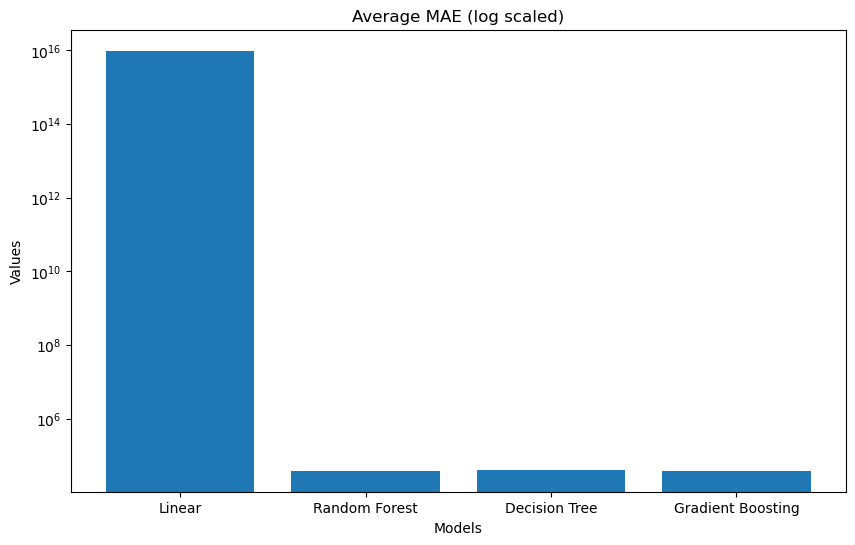

In [127]:
plot_average_metrics(names,average_mae,'Average MAE (log scaled)',True)

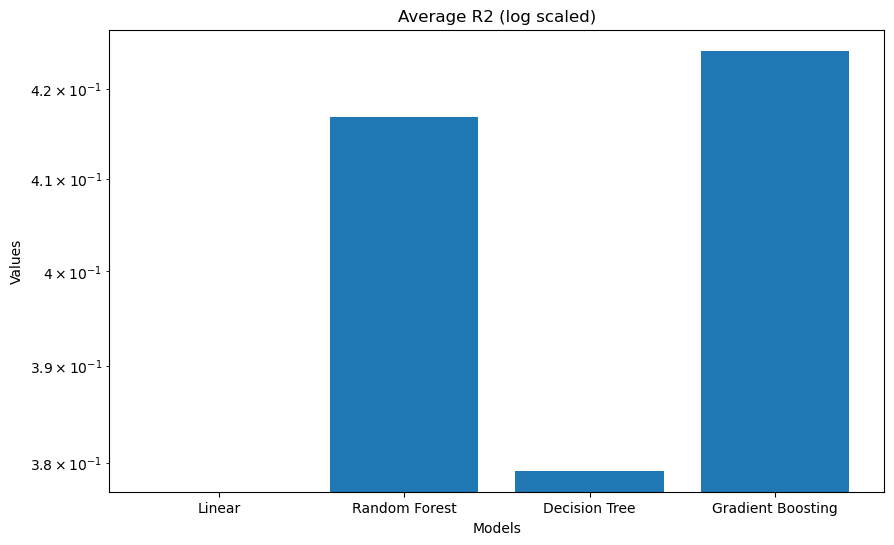

In [128]:
plot_average_metrics(names,average_r2,'Average R2 (log scaled)',True)

In [129]:
index = 0

for i in range(len(names)):
    print('Model: ',names[i])
    
    for z in range(num_folds):
        print('Fold ',i+1)
        print("Mean Squared Error (MSE):", mse_all[i][z])
        print("Mean Absolute Error (MAE):", mae_all[i][z])
        print("R-squared (R2):", r2_all[i][z])
        
    print()

Model:  Linear
Fold  1
Mean Squared Error (MSE): 1.1842165046911524e+33
Mean Absolute Error (MAE): 4299071424262278.5
R-squared (R2): -2.8669251094185337e+23
Fold  1
Mean Squared Error (MSE): 4.920177360577863e+33
Mean Absolute Error (MAE): 7271110896341775.0
R-squared (R2): -1.1263659761650527e+24
Fold  1
Mean Squared Error (MSE): 3.6101788884310717e+34
Mean Absolute Error (MAE): 1.2224726829683788e+16
R-squared (R2): -8.292304774519901e+24
Fold  1
Mean Squared Error (MSE): 2.593516135806566e+34
Mean Absolute Error (MAE): 1.7103939797072576e+16
R-squared (R2): -5.524924257358031e+24
Fold  1
Mean Squared Error (MSE): 3.733365378219284e+33
Mean Absolute Error (MAE): 7543258740271206.0
R-squared (R2): -9.157519105575806e+23

Model:  Random Forest
Fold  2
Mean Squared Error (MSE): 2421191025.4462404
Mean Absolute Error (MAE): 37749.34963235628
R-squared (R2): 0.4138425433142423
Fold  2
Mean Squared Error (MSE): 2572224870.977425
Mean Absolute Error (MAE): 39208.552353563005
R-squared (R2)

In [130]:
def plot_fold_metrics(labels,metrics,names,title,scale=False):
    plt.figure(figsize=(8, 6))

    plt.plot(labels, metrics[0], marker='o', linestyle='-', color='b', label=names[0])
    plt.plot(labels, metrics[1], marker='o', linestyle='-', color='g', label=names[1])
    plt.plot(labels, metrics[2], marker='o', linestyle='-', color='r', label=names[2])
    plt.plot(labels, metrics[3], marker='o', linestyle='-', color='y', label=names[3])

    plt.xlabel('Folds')
    plt.ylabel('Values')
    if(scale):
        plt.yscale('log')
    plt.title(title)
    plt.legend()
    plt.show()

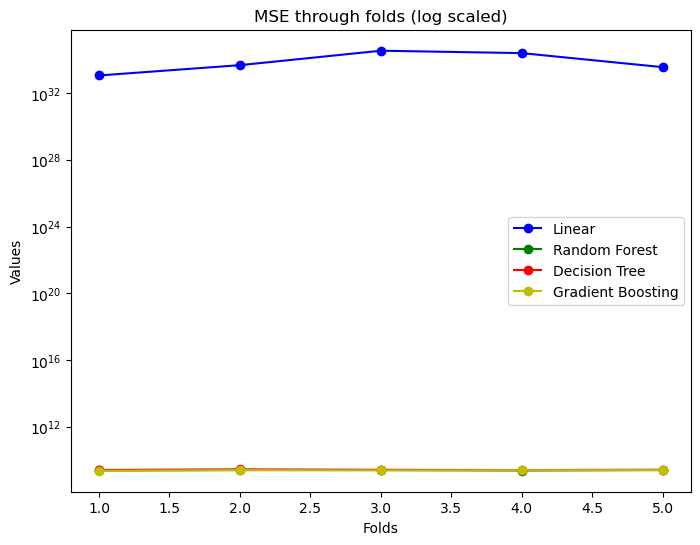

In [131]:
folds_label = np.arange(1, num_folds + 1)

plot_fold_metrics(folds_label,mse_all,names,'MSE through folds (log scaled)',True)

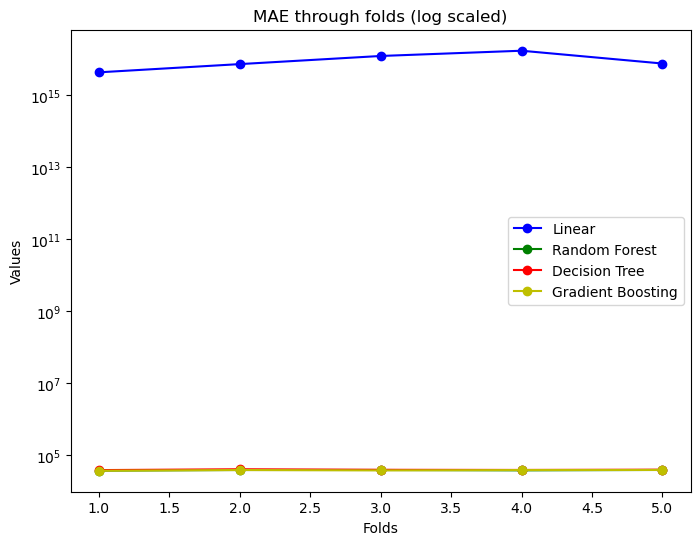

In [132]:
plot_fold_metrics(folds_label,mae_all,names,'MAE through folds (log scaled)',True)

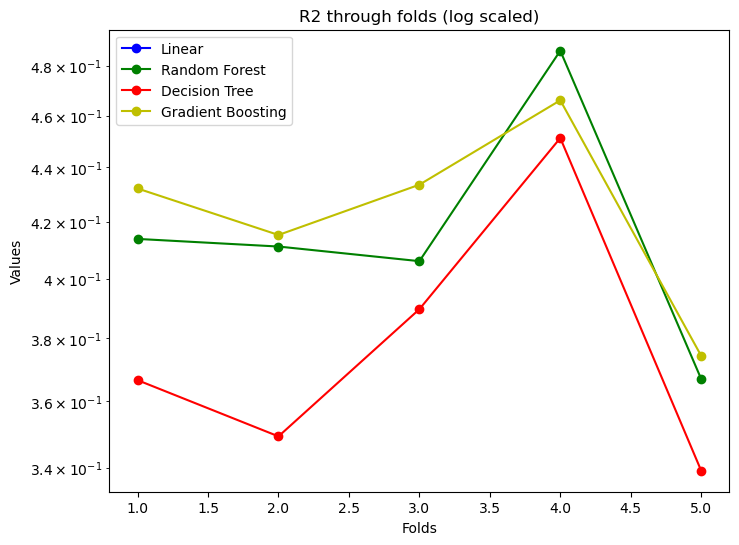

In [133]:
plot_fold_metrics(folds_label,r2_all,names,'R2 through folds (log scaled)',True)

### Test Prediction

In [134]:
#print("Enter the following information:")

#experience_level_input = input("Experience Level (e.g., Entry, Mid, Senior, Executive): ")
#company_size_input = input("Company Size (e.g., Small, Medium, Large): ")
#year_input = input("Year: ")
#job_title_input = input("Job Title: ")
#employment_type_input = input("Employment Type (e.g., Full-Time, Contract, Part-Time, Freelance): ")
#company_loc_input = input("Company Location: ")

user_input_df = pd.DataFrame({
    "Experience Level": ['Entry'],
    "Company Size": ['Small'],
    "Year": [2023],
    "Job Title": ['Data Scientist'],
    "Employment Type": ['Full-Time'],
    "Company Location": ['Malaysia']
})


try:
    # Transform user input using the preprocessor
    user_input_transformed = preprocessor.transform(user_input_df)

    predicted_salary_linear = linearRegression_model.predict(user_input_transformed)
    predicted_salary_forest = randomForest_model.predict(user_input_transformed)
    predicted_salary_decision = decisionTree_model.predict(user_input_transformed)
    predicted_salary_gradient = gradientBoosting_model.predict(user_input_transformed)

    print("Predicted Salary using Linear Regression Model (USD):", predicted_salary_linear[0])
    print("Predicted Salary using Random Forest Regression Model (USD):", predicted_salary_forest[0])
    print("Predicted Salary using Decision Tree Regression Model (USD):", predicted_salary_decision[0])
    print("Predicted Salary using Gradient Boosting Regression Model (USD):", predicted_salary_gradient[0])
except:
    print("Unknown values")

Predicted Salary using Linear Regression Model (USD): 31616.0
Predicted Salary using Random Forest Regression Model (USD): 49816.36701549918
Predicted Salary using Decision Tree Regression Model (USD): 54706.6936416185
Predicted Salary using Gradient Boosting Regression Model (USD): 46236.57082117989
